# Analysing Discounts

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

In [3]:
url = 'https://drive.google.com/file/d/1yPhoIBPQkf2DYQcNrV_ls-aFwewtSjar/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

url = 'https://drive.google.com/file/d/1_tN-LI-vN-p1Zi_mgPLecGMM_G5EZ1fS/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

url = 'https://drive.google.com/file/d/1f_kcB7cJivlR--_jZ9ilkj4tkLh3mWUU/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_qu = pd.read_csv(path)

In [4]:
url = 'https://drive.google.com/file/d/1cg4TgEG0XSBTCwXIJCEPrlVPV5rd2gsO/view?usp=sharing'
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_category = pd.read_csv(path)
products_category

,sku,name,desc,price,in_stock,type,long,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,Rain Design,others
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,Apple,computer_accessories
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,Apple,computer_accessories
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,Apple,audio_headphones
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,Kingston,computer_accessories
...,...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,Belkin,smartwatches_cameras_printers
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Thule,others
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Thule,others
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,Thule,others


In [5]:
orders_qu_test = orders_qu.copy()
orderlines_qu_test = orderlines_qu.copy()
products_qu_test = products_qu.copy()

In [6]:
orders_qu_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37404 entries, 0 to 37403
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      37404 non-null  int64  
 1   created_date  37404 non-null  object 
 2   total_paid    37404 non-null  float64
 3   state         37404 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [7]:
orders_qu_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37404 entries, 0 to 37403
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      37404 non-null  int64  
 1   created_date  37404 non-null  object 
 2   total_paid    37404 non-null  float64
 3   state         37404 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [8]:
orders_qu_test['created_date'] = pd.to_datetime(orders_qu_test['created_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [9]:
orders_qu['created_date'] = pd.to_datetime(orders_qu['created_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [10]:
orderlines_qu_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49598 entries, 0 to 49597
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                49598 non-null  int64  
 1   id_order          49598 non-null  int64  
 2   product_id        49598 non-null  int64  
 3   product_quantity  49598 non-null  int64  
 4   sku               49598 non-null  object 
 5   unit_price        49598 non-null  float64
 6   date              49598 non-null  object 
 7   unit_price_total  49598 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 3.0+ MB


In [11]:
orderlines_qu_test['date'] = pd.to_datetime(orderlines_qu_test['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [12]:
orderlines_qu['date'] = pd.to_datetime(orderlines_qu['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [13]:
products_qu_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9992 entries, 0 to 9991
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sku       9992 non-null   object 
 1   name      9992 non-null   object 
 2   desc      9992 non-null   object 
 3   price     9992 non-null   float64
 4   in_stock  9992 non-null   int64  
 5   type      9946 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.5+ KB


In [14]:
orders_qu

,order_id,created_date,total_paid,state
0,241423,2017-11-06 13:10:02,136.15,Completed
1,242832,2017-12-31 17:40:03,15.76,Completed
2,243330,2017-02-16 10:59:38,84.98,Completed
3,245275,2017-06-28 11:35:37,149.00,Completed
4,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
37399,527042,2018-03-14 11:47:50,18.98,Completed
37400,527070,2018-03-14 11:50:48,24.97,Completed
37401,527074,2018-03-14 11:51:42,24.97,Completed
37402,527096,2018-03-14 11:58:40,34.96,Completed


In [15]:
orderlines_qu

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
4,1119154,299563,0,1,BEA0065,256.49,2017-01-01 02:42:05,256.49
...,...,...,...,...,...,...,...,...
49593,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99
49594,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
49595,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
49596,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


In [16]:
products_qu

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364
...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392


What is the time period that the dataset covers?

In [17]:
time_range = (orders_qu['created_date'].min(), orders_qu['created_date'].max())
print("Dataset covers from", time_range[0], "to", time_range[1])

Dataset covers from 2017-01-01 01:51:47 to 2018-03-14 12:03:52


What is the overall revenue for that time?

In [18]:
total_revenue = orders_qu_test['total_paid'].sum()
total_revenue

np.float64(6479845.749999999)

Seasonal pattern:

In [19]:
orders_qu_test['year_month'] = orders_qu_test['created_date'].dt.to_period('M')
orders_qu_test

,order_id,created_date,total_paid,state,year_month
0,241423,2017-11-06 13:10:02,136.15,Completed,2017-11
1,242832,2017-12-31 17:40:03,15.76,Completed,2017-12
2,243330,2017-02-16 10:59:38,84.98,Completed,2017-02
3,245275,2017-06-28 11:35:37,149.00,Completed,2017-06
4,245595,2017-01-21 12:52:47,112.97,Completed,2017-01
...,...,...,...,...,...
37399,527042,2018-03-14 11:47:50,18.98,Completed,2018-03
37400,527070,2018-03-14 11:50:48,24.97,Completed,2018-03
37401,527074,2018-03-14 11:51:42,24.97,Completed,2018-03
37402,527096,2018-03-14 11:58:40,34.96,Completed,2018-03


In [20]:
revenue_month = orders_qu_test.groupby('year_month')['total_paid'].sum().reset_index()
revenue_month.rename(columns={'total_paid': 'total_revenue'}, inplace=True)
revenue_month

,year_month,total_revenue
0,2017-01,504767.05
1,2017-02,283023.86
2,2017-03,20689.21
3,2017-04,197513.31
4,2017-05,265924.30
5,2017-06,219304.47
6,2017-07,494727.40
7,2017-08,312709.14
8,2017-09,335715.26
9,2017-10,484419.52


<Axes: >

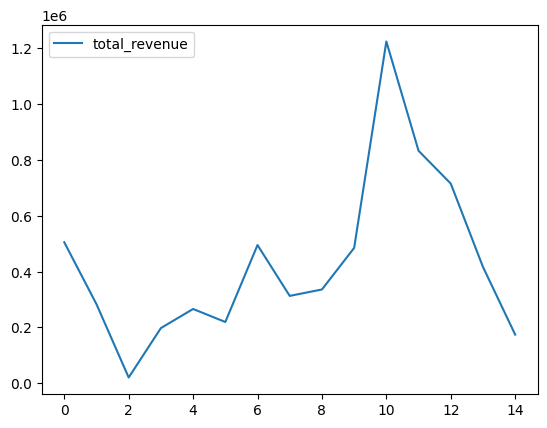

In [21]:
revenue_month.plot.line()

In [22]:
orderlines_product = orderlines_qu_test.merge(products_qu_test[['sku','name','price','in_stock']], on='sku')
orderlines_product

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total,name,price,in_stock
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,60.99,1
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,22.95,0
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,89.00,1
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,76.99,0
4,1119154,299563,0,1,BEA0065,256.49,2017-01-01 02:42:05,256.49,Solo3 Beats Headphones Wireless On-Ear Rose Gold,299.95,0
...,...,...,...,...,...,...,...,...,...,...,...
49593,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1
49594,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1
49595,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1
49596,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1


In [23]:
orderlines_product = orderlines_product.drop(columns='product_id')
orderlines_product

,id,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,price,in_stock
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,60.99,1
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,22.95,0
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,89.00,1
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,76.99,0
4,1119154,299563,1,BEA0065,256.49,2017-01-01 02:42:05,256.49,Solo3 Beats Headphones Wireless On-Ear Rose Gold,299.95,0
...,...,...,...,...,...,...,...,...,...,...
49593,1649447,527035,1,APP0698,9.99,2018-03-14 11:42:41,9.99,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1
49594,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1
49595,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1
49596,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1


In [24]:
orderlines_product['discount'] = (orderlines_product['price'] - orderlines_product['unit_price'])
orderlines_product

,id,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,price,in_stock,discount
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,60.99,1,13.50
1,1119119,299546,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,iOttie Easy View 2 Car Black Support,22.95,0,3.96
2,1119120,295347,1,APP0700,72.19,2017-01-01 01:54:11,72.19,Apple 85W MagSafe 2 charger MacBook Pro screen...,89.00,1,16.81
3,1119134,299556,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,(Open) Crucial 240GB SSD 7mm BX200,76.99,0,16.09
4,1119154,299563,1,BEA0065,256.49,2017-01-01 02:42:05,256.49,Solo3 Beats Headphones Wireless On-Ear Rose Gold,299.95,0,43.46
...,...,...,...,...,...,...,...,...,...,...,...
49593,1649447,527035,1,APP0698,9.99,2018-03-14 11:42:41,9.99,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1,15.01
49594,1649512,527070,2,APP0698,9.99,2018-03-14 11:49:01,19.98,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1,15.01
49595,1649522,527074,2,APP0698,9.99,2018-03-14 11:49:36,19.98,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1,15.01
49596,1649565,527096,3,APP0698,9.99,2018-03-14 11:54:35,29.97,Apple Lightning Cable Connector to USB 1m Whit...,25.00,1,15.01


In [25]:
new_order = [
    'id', 'id_order', 'product_quantity', 'sku', 'name', 'date', 'in_stock',  # order + descriptive
    'unit_price', 'price', 'unit_price_total', 'discount'                     # price-related
]

# Reorder DataFrame
orderlines_product = orderlines_product[new_order]
orderlines_product

,id,id_order,product_quantity,sku,name,date,in_stock,unit_price,price,unit_price_total,discount
0,1119116,299545,1,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,2017-01-01 01:46:16,1,47.49,60.99,47.49,13.50
1,1119119,299546,1,IOT0014,iOttie Easy View 2 Car Black Support,2017-01-01 01:50:34,0,18.99,22.95,18.99,3.96
2,1119120,295347,1,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,2017-01-01 01:54:11,1,72.19,89.00,72.19,16.81
3,1119134,299556,1,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,2017-01-01 02:20:14,0,60.90,76.99,60.90,16.09
4,1119154,299563,1,BEA0065,Solo3 Beats Headphones Wireless On-Ear Rose Gold,2017-01-01 02:42:05,0,256.49,299.95,256.49,43.46
...,...,...,...,...,...,...,...,...,...,...,...
49593,1649447,527035,1,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:42:41,1,9.99,25.00,9.99,15.01
49594,1649512,527070,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:01,1,9.99,25.00,19.98,15.01
49595,1649522,527074,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:36,1,9.99,25.00,19.98,15.01
49596,1649565,527096,3,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:54:35,1,9.99,25.00,29.97,15.01


In [26]:
orderlines_product['discount_percentage'] = ((orderlines_product['price'] - orderlines_product['unit_price']) / orderlines_product['price']) * 100
orderlines_product

/tmp/ipython-input-143373399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_product['discount_percentage'] = ((orderlines_product['price'] - orderlines_product['unit_price']) / orderlines_product['price']) * 100


,id,id_order,product_quantity,sku,name,date,in_stock,unit_price,price,unit_price_total,discount,discount_percentage
0,1119116,299545,1,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,2017-01-01 01:46:16,1,47.49,60.99,47.49,13.50,22.13
1,1119119,299546,1,IOT0014,iOttie Easy View 2 Car Black Support,2017-01-01 01:50:34,0,18.99,22.95,18.99,3.96,17.25
2,1119120,295347,1,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,2017-01-01 01:54:11,1,72.19,89.00,72.19,16.81,18.89
3,1119134,299556,1,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,2017-01-01 02:20:14,0,60.90,76.99,60.90,16.09,20.90
4,1119154,299563,1,BEA0065,Solo3 Beats Headphones Wireless On-Ear Rose Gold,2017-01-01 02:42:05,0,256.49,299.95,256.49,43.46,14.49
...,...,...,...,...,...,...,...,...,...,...,...,...
49593,1649447,527035,1,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:42:41,1,9.99,25.00,9.99,15.01,60.04
49594,1649512,527070,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:01,1,9.99,25.00,19.98,15.01,60.04
49595,1649522,527074,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:36,1,9.99,25.00,19.98,15.01,60.04
49596,1649565,527096,3,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:54:35,1,9.99,25.00,29.97,15.01,60.04


In [27]:
orderlines_product['year_month'] = orderlines_product['date'].dt.to_period('M')
orderlines_product

/tmp/ipython-input-4273986064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_product['year_month'] = orderlines_product['date'].dt.to_period('M')


,id,id_order,product_quantity,sku,name,date,in_stock,unit_price,price,unit_price_total,discount,discount_percentage,year_month
0,1119116,299545,1,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,2017-01-01 01:46:16,1,47.49,60.99,47.49,13.50,22.13,2017-01
1,1119119,299546,1,IOT0014,iOttie Easy View 2 Car Black Support,2017-01-01 01:50:34,0,18.99,22.95,18.99,3.96,17.25,2017-01
2,1119120,295347,1,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,2017-01-01 01:54:11,1,72.19,89.00,72.19,16.81,18.89,2017-01
3,1119134,299556,1,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,2017-01-01 02:20:14,0,60.90,76.99,60.90,16.09,20.90,2017-01
4,1119154,299563,1,BEA0065,Solo3 Beats Headphones Wireless On-Ear Rose Gold,2017-01-01 02:42:05,0,256.49,299.95,256.49,43.46,14.49,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49593,1649447,527035,1,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:42:41,1,9.99,25.00,9.99,15.01,60.04,2018-03
49594,1649512,527070,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:01,1,9.99,25.00,19.98,15.01,60.04,2018-03
49595,1649522,527074,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:36,1,9.99,25.00,19.98,15.01,60.04,2018-03
49596,1649565,527096,3,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:54:35,1,9.99,25.00,29.97,15.01,60.04,2018-03


# Overall data:

In [28]:
orders_product_category = orderlines_product.merge(products_category[['sku','category','long']], on='sku', how='left')
orders_product_category

,id,id_order,product_quantity,sku,name,date,in_stock,unit_price,price,unit_price_total,discount,discount_percentage,year_month,category,long
0,1119116,299545,1,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,2017-01-01 01:46:16,1,47.49,60.99,47.49,13.50,22.13,2017-01,others,OWC
1,1119119,299546,1,IOT0014,iOttie Easy View 2 Car Black Support,2017-01-01 01:50:34,0,18.99,22.95,18.99,3.96,17.25,2017-01,others,iOttie
2,1119120,295347,1,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,2017-01-01 01:54:11,1,72.19,89.00,72.19,16.81,18.89,2017-01,audio_headphones,Apple
3,1119134,299556,1,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,2017-01-01 02:20:14,0,60.90,76.99,60.90,16.09,20.90,2017-01,computer_accessories,Crucial
4,1119154,299563,1,BEA0065,Solo3 Beats Headphones Wireless On-Ear Rose Gold,2017-01-01 02:42:05,0,256.49,299.95,256.49,43.46,14.49,2017-01,audio_headphones,Beats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49593,1649447,527035,1,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:42:41,1,9.99,25.00,9.99,15.01,60.04,2018-03,audio_headphones,Apple
49594,1649512,527070,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:01,1,9.99,25.00,19.98,15.01,60.04,2018-03,audio_headphones,Apple
49595,1649522,527074,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:36,1,9.99,25.00,19.98,15.01,60.04,2018-03,audio_headphones,Apple
49596,1649565,527096,3,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:54:35,1,9.99,25.00,29.97,15.01,60.04,2018-03,audio_headphones,Apple


In [29]:
revenue_orders_month = orderlines_product.groupby('year_month').agg(
    total_revenue=('unit_price_total', 'sum'),
    total_orders=('id_order', 'nunique'),
    avg_discount = ('discount_percentage', 'mean')).reset_index()   # use nunique to count unique orders

revenue_orders_month.rename(columns={'unit_price_total': 'Total_revenue','id_order':'Total_orders','discount_percentage':'Avg_discount'}, inplace=True)
revenue_orders_month

,year_month,total_revenue,total_orders,avg_discount
0,2017-01,494031.93,4185,23.37
1,2017-02,269873.28,1883,19.16
2,2017-03,21302.35,156,18.82
3,2017-04,196971.90,1392,18.20
4,2017-05,263150.52,1551,15.31
5,2017-06,212994.79,1208,17.07
6,2017-07,485417.04,2835,24.88
7,2017-08,305688.69,1912,19.55
8,2017-09,329083.35,1759,19.65
9,2017-10,475502.31,2576,21.44


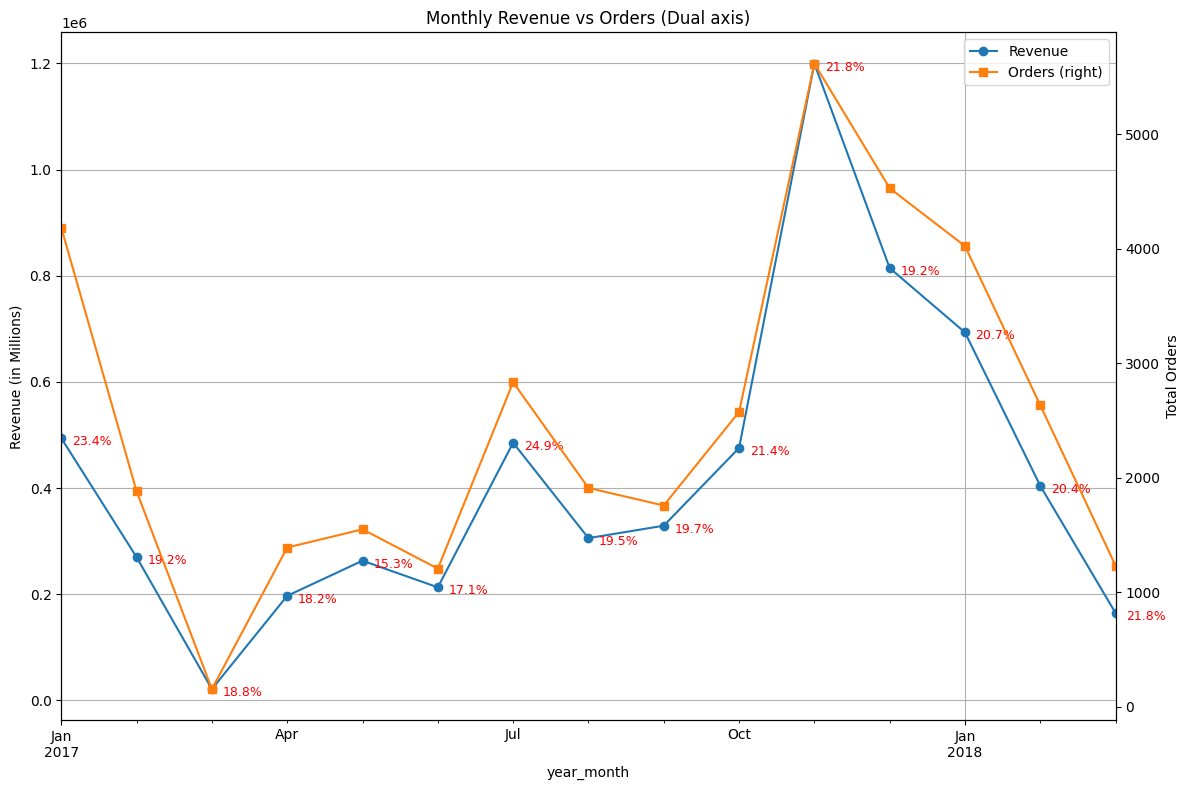

In [30]:
ax = revenue_orders_month.plot(
    x='year_month',
    y='total_revenue',
    kind='line',
    marker='o',
    figsize=(12,8),
    grid=True,
    label = 'Revenue'
)
revenue_orders_month.plot(
    x='year_month',
    y='total_orders',
    kind='line',
    marker='s',
    ax=ax,
    secondary_y=True,
    label='Orders'
)

ax.set_ylabel('Revenue (in Millions)')
ax.right_ax.set_ylabel('Total Orders')
ax.set_title('Monthly Revenue vs Orders (Dual axis)');


# 🔑 Annotate average discount values (on revenue line points)
for x, y, d in zip(
    revenue_orders_month['year_month'],
    revenue_orders_month['total_revenue'],
    revenue_orders_month['avg_discount']
):
    ax.annotate(f"{d:.1f}%",          # show discount as %
                (x, y),               # (x=month string, y=revenue value)
                textcoords="offset points",
                xytext=(22,-5),        # shift upward
                ha='center',
                fontsize=9,
                color="red")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
revenue_month['revenue_pct'] = (revenue_month['total_revenue'] / total_revenue) * 100

# Round for readability
revenue_month['revenue_pct'] = revenue_month['revenue_pct'].round(2)

In [32]:
revenue_orders_month['year_month'] = revenue_orders_month['year_month'].dt.to_timestamp()


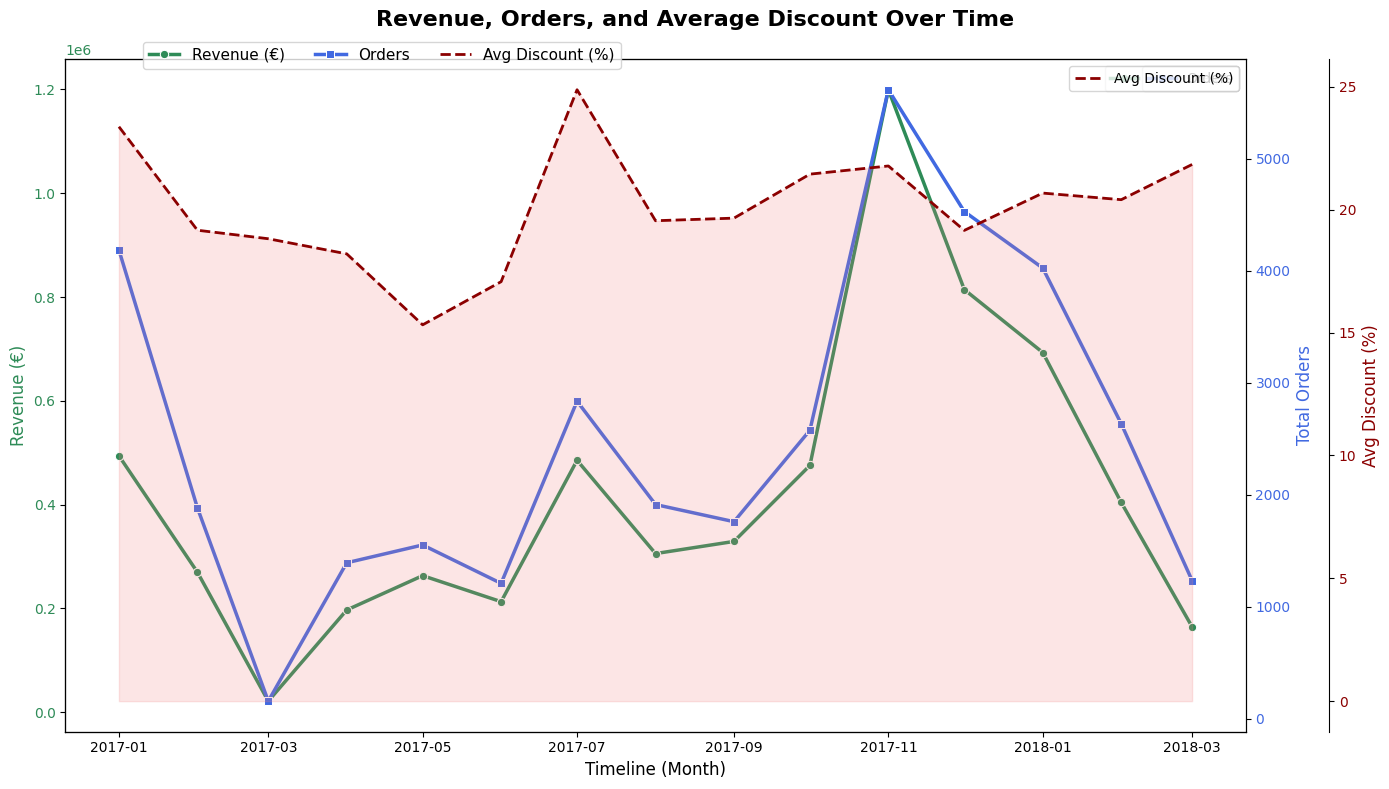

In [33]:
# revenue_orders_month['year_month'] = revenue_orders_month['year_month'].dt.to_timestamp()

# Create the figure
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- Revenue (line, left y-axis) ---
sns.lineplot(
    data=revenue_orders_month,
    x="year_month", y="total_revenue",
    marker="o", linewidth=2.5, color="seagreen", label="Revenue (€)", ax=ax1
)
ax1.set_ylabel("Revenue (€)", fontsize=12, color="seagreen")
ax1.tick_params(axis="y", labelcolor="seagreen")

# --- Orders (line, right y-axis) ---
ax2 = ax1.twinx()
sns.lineplot(
    data=revenue_orders_month,
    x="year_month", y="total_orders",
    marker="s", linewidth=2.5, color="royalblue", label="Orders", ax=ax2
)
ax2.set_ylabel("Total Orders", fontsize=12, color="royalblue")
ax2.tick_params(axis="y", labelcolor="royalblue")

# --- Discount (dashed line + shaded background, third y-axis effect) ---
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # move third axis outward
sns.lineplot(
    data=revenue_orders_month,
    x="year_month", y="avg_discount",
    linestyle="--", color="darkred", linewidth=2.0, label="Avg Discount (%)", ax=ax3
)
ax3.fill_between(
    revenue_orders_month['year_month'],
    0, revenue_orders_month['avg_discount'],
    color="lightcoral", alpha=0.2
)
ax3.set_ylabel("Avg Discount (%)", fontsize=12, color="darkred")
ax3.tick_params(axis="y", labelcolor="darkred")

# --- Titles & Legends ---
fig.suptitle("Revenue, Orders, and Average Discount Over Time", fontsize=16, fontweight="bold")
ax1.set_xlabel("Timeline (Month)", fontsize=12)

# Combine legends from all 3 axes
lines, labels = [], []
for ax in [ax1, ax2, ax3]:
    line, label = ax.get_legend_handles_labels()
    lines += line
    labels += label
fig.legend(lines, labels, loc="upper left", bbox_to_anchor=(0.1, 0.95), fontsize=11, ncol=3)

plt.tight_layout()
plt.show()

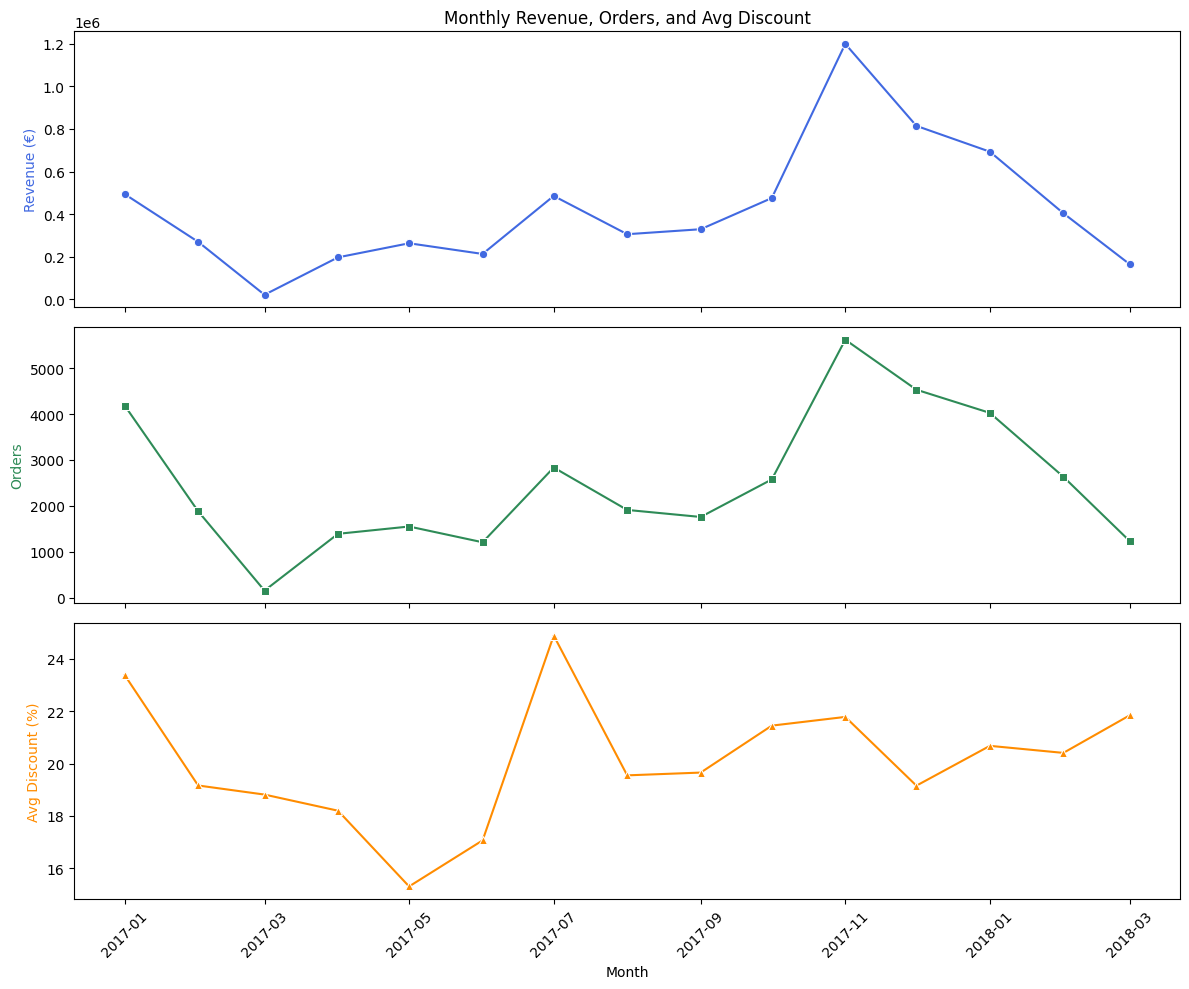

In [34]:
fig, axes = plt.subplots(3, 1, figsize=(12,10), sharex=True)

sns.lineplot(
    data=revenue_orders_month, x="year_month", y="total_revenue",
    marker="o", ax=axes[0], color="royalblue"
)
axes[0].set_ylabel("Revenue (€)", color="royalblue")
axes[0].set_title("Monthly Revenue, Orders, and Avg Discount")

sns.lineplot(
    data=revenue_orders_month, x="year_month", y="total_orders",
    marker="s", ax=axes[1], color="seagreen"
)
axes[1].set_ylabel("Orders", color="seagreen")

sns.lineplot(
    data=revenue_orders_month, x="year_month", y="avg_discount",
    marker="^", ax=axes[2], color="darkorange"
)
axes[2].set_ylabel("Avg Discount (%)", color="darkorange")
axes[2].set_xlabel("Month")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What are the most sold products?

In [35]:
products_qu_test.columns

Index(['sku', 'name', 'desc', 'price', 'in_stock', 'type'], dtype='object')

In [36]:
top_products = orderlines_product.groupby(['sku','name']).agg({
    'unit_price_total': 'sum',
    'id_order': 'count',
    'discount_percentage' : 'mean'
}).sort_values(by='unit_price_total', ascending=False).head(15).reset_index()
top_products

,sku,name,unit_price_total,id_order,discount_percentage
0,LGE0044,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",135375.83,201,5.32
1,APP2446,Apple iPhone 6 32GB Space Gray,96613.16,240,13.64
2,APP1922,AirPods Apple Bluetooth Headset for iPhone iPa...,86473.26,511,9.99
3,APP2477,Apple iPhone 64GB Space Gray 8,85301.93,102,2.35
4,APP1970,Apple iPhone 32GB Space Gray,76536.43,208,13.41
5,APP2485,Apple iPhone 8 Plus 64GB Gold,70721.79,78,2.59
6,WDT0183,"Red 4TB WD 35 ""Mac PC hard drive and NAS",65589.96,289,18.36
7,APP2483,Apple iPhone 8 Plus 64GB Space Gray,60090.08,62,2.51
8,APP2479,Apple iPhone 64GB Gold 8,52981.19,66,2.26
9,APP1190,IPhone AppleCare Protection Plan,51954.97,867,22.24


In [37]:
high_volume_threshold = top_products['id_order'].median()
low_revenue_threshold = top_products['unit_price_total'].median()

# Flag high-volume, low-revenue products
top_products['category'] = 'Other'
top_products.loc[
    (top_products['id_order'] > high_volume_threshold) &
    (top_products['unit_price_total'] < low_revenue_threshold),
    'category'
] = 'High Volume - Low Revenue'
top_products

,sku,name,unit_price_total,id_order,discount_percentage,category
0,LGE0044,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",135375.83,201,5.32,Other
1,APP2446,Apple iPhone 6 32GB Space Gray,96613.16,240,13.64,Other
2,APP1922,AirPods Apple Bluetooth Headset for iPhone iPa...,86473.26,511,9.99,Other
3,APP2477,Apple iPhone 64GB Space Gray 8,85301.93,102,2.35,Other
4,APP1970,Apple iPhone 32GB Space Gray,76536.43,208,13.41,Other
5,APP2485,Apple iPhone 8 Plus 64GB Gold,70721.79,78,2.59,Other
6,WDT0183,"Red 4TB WD 35 ""Mac PC hard drive and NAS",65589.96,289,18.36,Other
7,APP2483,Apple iPhone 8 Plus 64GB Space Gray,60090.08,62,2.51,Other
8,APP2479,Apple iPhone 64GB Gold 8,52981.19,66,2.26,Other
9,APP1190,IPhone AppleCare Protection Plan,51954.97,867,22.24,High Volume - Low Revenue


Text(0, 0.5, 'Total Revenue (€)')

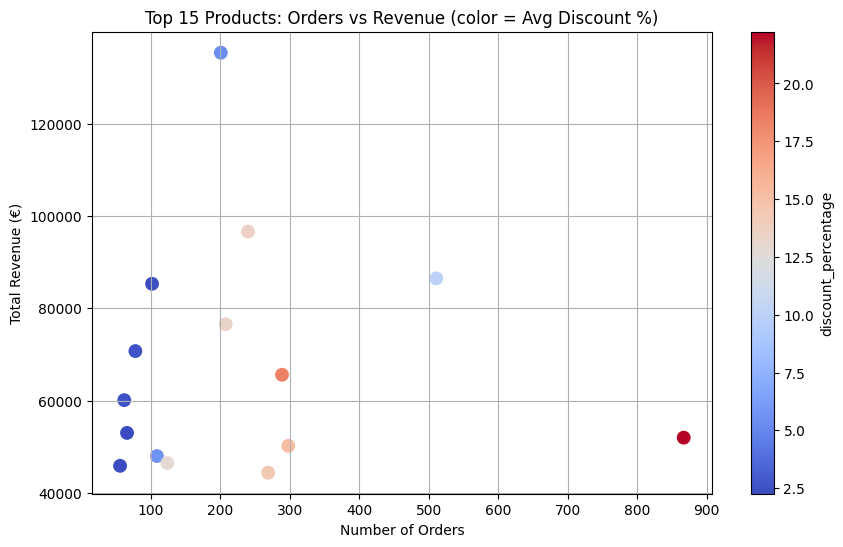

In [38]:
ax = top_products.plot(
    kind='scatter',
    x='id_order',
    y='unit_price_total',
    figsize=(10,6),
    c='discount_percentage',   # color by discount
    colormap='coolwarm',
    s=80,                      # bubble size
    grid=True,
    title='Top 15 Products: Orders vs Revenue (color = Avg Discount %)'
)

ax.set_xlabel("Number of Orders")
ax.set_ylabel("Total Revenue (€)")

In [39]:
product_sold = orderlines_product.groupby(['sku','name','unit_price','discount_percentage'])[['product_quantity','unit_price_total']].sum().sort_values(by='product_quantity',ascending=False).reset_index().head(20)
product_sold

,sku,name,unit_price,discount_percentage,product_quantity,unit_price_total
0,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,9.99,60.04,534,5334.66
1,APP1190,IPhone AppleCare Protection Plan,51.00,27.14,312,15912.00
2,APP1190,IPhone AppleCare Protection Plan,56.00,20.00,305,17080.00
3,APP1922,AirPods Apple Bluetooth Headset for iPhone iPa...,154.00,13.97,237,36498.00
4,MAT0010,Matias numeric keyboard + Spanish Aluminio Plata,69.99,0.00,201,14067.99
5,NTE0013,"AdaptaDrive NewerTech adapter 2.5 ""to 3.5"" SATA",19.99,25.94,198,3958.02
6,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,8.99,64.04,184,1654.16
7,MAC0144,Macally Lampcharge Lamp with 4 USB ports,24.99,37.45,168,4198.32
8,APP0927,EarPods Apple Headphones with Remote and Mic (...,18.99,45.74,168,3190.32
9,PAC2477,Pack of 2 units Zagg Coda Wireless Headsets Black,19.99,66.67,163,3258.37


In [40]:
product_sold['discount_percentage'].mean()

np.float64(34.51925297994935)

In [41]:
product_revenue = orderlines_product.groupby(['sku','name','unit_price','discount_percentage'])[['product_quantity','unit_price_total']].sum().sort_values(by='unit_price_total',ascending=False).reset_index()
product_revenue.head(20)

,sku,name,unit_price,discount_percentage,product_quantity,unit_price_total
0,APP2446,Apple iPhone 6 32GB Space Gray,389.00,13.43,148,57572.00
1,APP1922,AirPods Apple Bluetooth Headset for iPhone iPa...,154.00,13.97,237,36498.00
2,APP2477,Apple iPhone 64GB Space Gray 8,793.00,1.98,42,33306.00
3,APP1970,Apple iPhone 32GB Space Gray,359.00,14.32,88,31592.00
4,LGE0044,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",559.99,6.51,46,25759.54
5,LGE0044,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",569.99,4.84,45,25649.55
6,LGE0044,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",549.00,8.35,46,25254.00
7,APP2485,Apple iPhone 8 Plus 64GB Gold,899.00,2.18,28,25172.00
8,APP2446,Apple iPhone 6 32GB Space Gray,390.33,13.13,59,23029.47
9,APP1970,Apple iPhone 32GB Space Gray,360.33,14.00,60,21619.80


In [42]:
product_revenue['discount_percentage'].mean()

np.float64(19.459036574568927)

In [43]:
top_discount_products = orderlines_product.groupby(['sku','name','date','price','unit_price','discount','discount_percentage'])[['product_quantity','unit_price_total']].sum().sort_values(by='discount_percentage',ascending=False).reset_index().head(25)
top_discount_products

,sku,name,date,price,unit_price,discount,discount_percentage,product_quantity,unit_price_total
0,MOP0109,Mophie Powerstation Mini Universal 4000mAh Bat...,2018-02-16 12:47:23,69.95,2.00,67.95,97.14,2,4.00
1,MOP0108,Mophie Powerstation Mini Universal 4000mAh Bat...,2018-02-16 11:25:43,69.95,3.99,65.96,94.30,2,7.98
2,MOP0109,Mophie Powerstation Mini Universal 4000mAh Bat...,2018-02-16 11:54:59,69.95,3.99,65.96,94.30,2,7.98
3,MOP0109,Mophie Powerstation Mini Universal 4000mAh Bat...,2018-02-16 11:58:55,69.95,3.99,65.96,94.30,2,7.98
4,MOP0107,Mophie Powerstation 4000mAh Battery Plus Mini ...,2018-02-16 09:42:27,69.95,3.99,65.96,94.30,2,7.98
5,MOP0107,Mophie Powerstation 4000mAh Battery Plus Mini ...,2018-02-16 09:40:49,69.95,3.99,65.96,94.30,2,7.98
6,MOP0107,Mophie Powerstation 4000mAh Battery Plus Mini ...,2018-02-16 09:06:25,69.95,3.99,65.96,94.30,2,7.98
7,MOP0107,Mophie Powerstation 4000mAh Battery Plus Mini ...,2018-02-16 09:08:53,69.95,3.99,65.96,94.30,2,7.98
8,MOP0107,Mophie Powerstation 4000mAh Battery Plus Mini ...,2018-02-16 09:03:35,69.95,3.99,65.96,94.30,2,7.98
9,MOP0108,Mophie Powerstation Mini Universal 4000mAh Bat...,2018-02-16 10:50:02,69.95,3.99,65.96,94.30,2,7.98


In [44]:
top_discount_products['discount_percentage'].mean()

np.float64(91.57532947579091)

In [45]:
orderlines_product['price'].sum()

np.float64(6766806.380000001)

In [46]:
order_discount = orderlines_product[orderlines_product['discount'] > 0]
order_discount

,id,id_order,product_quantity,sku,name,date,in_stock,unit_price,price,unit_price_total,discount,discount_percentage,year_month
0,1119116,299545,1,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,2017-01-01 01:46:16,1,47.49,60.99,47.49,13.50,22.13,2017-01
1,1119119,299546,1,IOT0014,iOttie Easy View 2 Car Black Support,2017-01-01 01:50:34,0,18.99,22.95,18.99,3.96,17.25,2017-01
2,1119120,295347,1,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,2017-01-01 01:54:11,1,72.19,89.00,72.19,16.81,18.89,2017-01
3,1119134,299556,1,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,2017-01-01 02:20:14,0,60.90,76.99,60.90,16.09,20.90,2017-01
4,1119154,299563,1,BEA0065,Solo3 Beats Headphones Wireless On-Ear Rose Gold,2017-01-01 02:42:05,0,256.49,299.95,256.49,43.46,14.49,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49593,1649447,527035,1,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:42:41,1,9.99,25.00,9.99,15.01,60.04,2018-03
49594,1649512,527070,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:01,1,9.99,25.00,19.98,15.01,60.04,2018-03
49595,1649522,527074,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:36,1,9.99,25.00,19.98,15.01,60.04,2018-03
49596,1649565,527096,3,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:54:35,1,9.99,25.00,29.97,15.01,60.04,2018-03


In [47]:
discount_counts = pd.Series({
    'With Discount': (orderlines_product['discount_percentage'] > 0).sum(),
    'Without Discount': (orderlines_product['discount_percentage'] <= 0).sum()
})

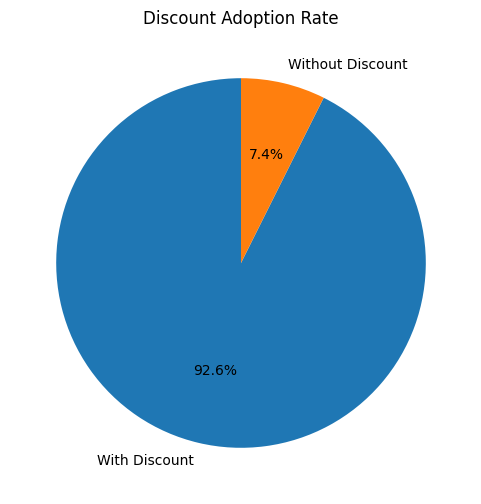

In [48]:
discount_counts.plot(
    kind='pie',
    autopct='%1.1f%%',     # show percentage
    startangle=90,         # rotate for better appearance
    figsize=(6,6),         # size of the chart
    legend=False,          # hide legend (optional)
    title='Discount Adoption Rate',
    # wedgeprops = {'width':0.7}    # creates donut chart
);

In [49]:
orderlines_product['year_month'] = orderlines_product['date'].dt.to_period('M')
orderlines_product

/tmp/ipython-input-4273986064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_product['year_month'] = orderlines_product['date'].dt.to_period('M')


,id,id_order,product_quantity,sku,name,date,in_stock,unit_price,price,unit_price_total,discount,discount_percentage,year_month
0,1119116,299545,1,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,2017-01-01 01:46:16,1,47.49,60.99,47.49,13.50,22.13,2017-01
1,1119119,299546,1,IOT0014,iOttie Easy View 2 Car Black Support,2017-01-01 01:50:34,0,18.99,22.95,18.99,3.96,17.25,2017-01
2,1119120,295347,1,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,2017-01-01 01:54:11,1,72.19,89.00,72.19,16.81,18.89,2017-01
3,1119134,299556,1,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,2017-01-01 02:20:14,0,60.90,76.99,60.90,16.09,20.90,2017-01
4,1119154,299563,1,BEA0065,Solo3 Beats Headphones Wireless On-Ear Rose Gold,2017-01-01 02:42:05,0,256.49,299.95,256.49,43.46,14.49,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49593,1649447,527035,1,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:42:41,1,9.99,25.00,9.99,15.01,60.04,2018-03
49594,1649512,527070,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:01,1,9.99,25.00,19.98,15.01,60.04,2018-03
49595,1649522,527074,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:36,1,9.99,25.00,19.98,15.01,60.04,2018-03
49596,1649565,527096,3,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:54:35,1,9.99,25.00,29.97,15.01,60.04,2018-03


In [50]:
discount_month = orderlines_product.groupby('year_month').agg({'discount_percentage':'mean','unit_price_total':'sum'}).reset_index()
discount_month

,year_month,discount_percentage,unit_price_total
0,2017-01,23.37,494031.93
1,2017-02,19.16,269873.28
2,2017-03,18.82,21302.35
3,2017-04,18.20,196971.90
4,2017-05,15.31,263150.52
5,2017-06,17.07,212994.79
6,2017-07,24.88,485417.04
7,2017-08,19.55,305688.69
8,2017-09,19.65,329083.35
9,2017-10,21.44,475502.31


Monthly order vs Avg.discounts:

In [51]:
discount_month['discount_percentage'].mean()

np.float64(20.087301559589793)

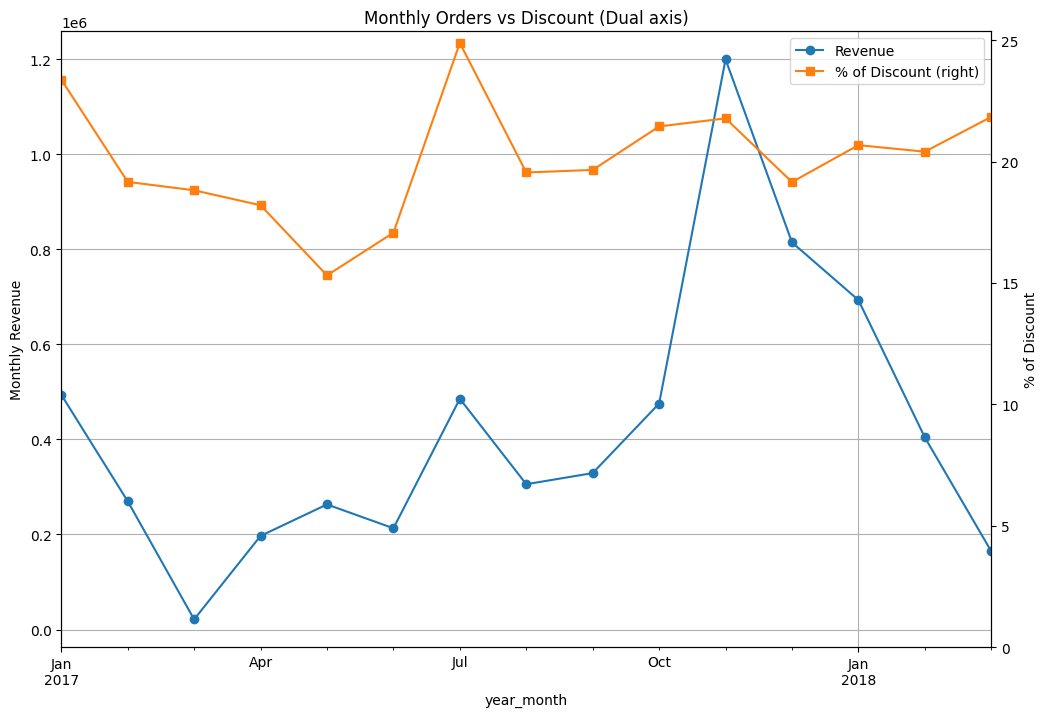

In [52]:
ax = discount_month.plot(
    x='year_month',
    y='unit_price_total',
    kind='line',
    marker='o',
    figsize=(12,8),
    grid=True,
    label = 'Revenue'
)
discount_month.plot(
    x='year_month',
    y='discount_percentage',
    kind='line',
    marker='s',
    ax=ax,
    secondary_y=True,
    label='% of Discount'
)
ax.set_ylabel('Monthly Revenue')
ax.right_ax.set_ylabel('% of Discount')
ax.set_title('Monthly Orders vs Discount (Dual axis)')
ax.right_ax.set_ylim(0,None);

In [53]:
revenue_orders_dict_month = (
    orders_product_category
    .groupby('year_month')
    .agg(
        total_revenue=('unit_price_total', 'sum'),
        total_orders=('id_order', 'nunique'),
        avg_discount=('discount_percentage', 'mean')
    )
    .reset_index()
)

# Check the result
revenue_orders_dict_month

,year_month,total_revenue,total_orders,avg_discount
0,2017-01,494031.93,4185,23.37
1,2017-02,269873.28,1883,19.16
2,2017-03,21302.35,156,18.82
3,2017-04,196971.90,1392,18.20
4,2017-05,263150.52,1551,15.31
5,2017-06,212994.79,1208,17.07
6,2017-07,485417.04,2835,24.88
7,2017-08,305688.69,1912,19.55
8,2017-09,329083.35,1759,19.65
9,2017-10,475502.31,2576,21.44


In [54]:
revenue_orders_dict_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   year_month     15 non-null     period[M]
 1   total_revenue  15 non-null     float64  
 2   total_orders   15 non-null     int64    
 3   avg_discount   15 non-null     float64  
dtypes: float64(2), int64(1), period[M](1)
memory usage: 612.0 bytes


In [55]:
revenue_orders_dict_month['year_month'] = revenue_orders_dict_month['year_month'].dt.to_timestamp()

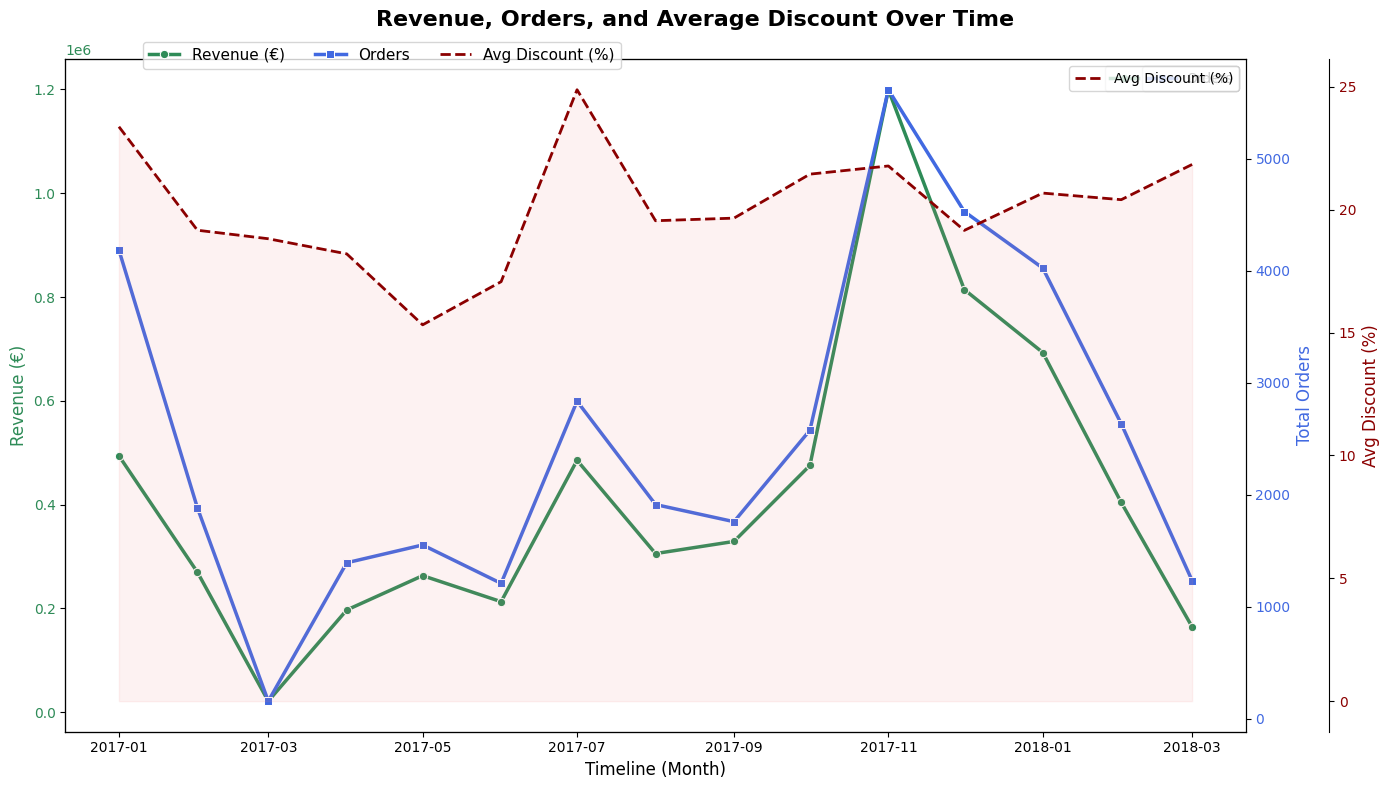

In [56]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# --- Revenue (line, left y-axis) ---
sns.lineplot(
    data=revenue_orders_dict_month,
    x="year_month", y="total_revenue",
    marker="o", linewidth=2.5, color="seagreen", label="Revenue (€)", ax=ax1
)
ax1.set_ylabel("Revenue (€)", fontsize=12, color="seagreen")
ax1.tick_params(axis="y", labelcolor="seagreen")

# --- Orders (line, right y-axis) ---
ax2 = ax1.twinx()
sns.lineplot(
    data=revenue_orders_dict_month,
    x="year_month", y="total_orders",
    marker="s", linewidth=2.5, color="royalblue", label="Orders", ax=ax2
)
ax2.set_ylabel("Total Orders", fontsize=12, color="royalblue")
ax2.tick_params(axis="y", labelcolor="royalblue")

# --- Discount (dashed line + shaded background, third y-axis effect) ---
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # move third axis outward
sns.lineplot(
    data=revenue_orders_dict_month,
    x="year_month", y="avg_discount",
    linestyle="--", color="darkred", linewidth=2.0, label="Avg Discount (%)", ax=ax3
)
ax3.fill_between(
    revenue_orders_dict_month['year_month'],
    0, revenue_orders_dict_month['avg_discount'],
    color="lightcoral", alpha=0.1
)
ax3.set_ylabel("Avg Discount (%)", fontsize=12, color="darkred")
ax3.tick_params(axis="y", labelcolor="darkred")

# --- Titles & Legends ---
fig.suptitle("Revenue, Orders, and Average Discount Over Time", fontsize=16, fontweight="bold")
ax1.set_xlabel("Timeline (Month)", fontsize=12)

# Combine legends from all 3 axes
lines, labels = [], []
for ax in [ax1, ax2, ax3]:
    line, label = ax.get_legend_handles_labels()
    lines += line
    labels += label
fig.legend(lines, labels, loc="upper left", bbox_to_anchor=(0.1, 0.95), fontsize=11, ncol=3)

plt.tight_layout()
plt.show()

In [57]:
orders_product_category

,id,id_order,product_quantity,sku,name,date,in_stock,unit_price,price,unit_price_total,discount,discount_percentage,year_month,category,long
0,1119116,299545,1,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,2017-01-01 01:46:16,1,47.49,60.99,47.49,13.50,22.13,2017-01,others,OWC
1,1119119,299546,1,IOT0014,iOttie Easy View 2 Car Black Support,2017-01-01 01:50:34,0,18.99,22.95,18.99,3.96,17.25,2017-01,others,iOttie
2,1119120,295347,1,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,2017-01-01 01:54:11,1,72.19,89.00,72.19,16.81,18.89,2017-01,audio_headphones,Apple
3,1119134,299556,1,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,2017-01-01 02:20:14,0,60.90,76.99,60.90,16.09,20.90,2017-01,computer_accessories,Crucial
4,1119154,299563,1,BEA0065,Solo3 Beats Headphones Wireless On-Ear Rose Gold,2017-01-01 02:42:05,0,256.49,299.95,256.49,43.46,14.49,2017-01,audio_headphones,Beats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49593,1649447,527035,1,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:42:41,1,9.99,25.00,9.99,15.01,60.04,2018-03,audio_headphones,Apple
49594,1649512,527070,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:01,1,9.99,25.00,19.98,15.01,60.04,2018-03,audio_headphones,Apple
49595,1649522,527074,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:36,1,9.99,25.00,19.98,15.01,60.04,2018-03,audio_headphones,Apple
49596,1649565,527096,3,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:54:35,1,9.99,25.00,29.97,15.01,60.04,2018-03,audio_headphones,Apple


In [58]:
order_revenue = orderlines_product.groupby('id_order').agg({
    'unit_price_total': 'sum',      # realized revenue per order
    'discount_percentage': 'mean'   # avg discount % per order
}).reset_index()
order_revenue

,id_order,unit_price_total,discount_percentage
0,241423,129.16,7.74
1,242832,10.77,40.13
2,243330,77.99,22.00
3,245275,149.00,16.76
4,245595,105.98,49.02
...,...,...,...
37399,527042,13.99,60.03
37400,527070,19.98,60.04
37401,527074,19.98,60.04
37402,527096,29.97,60.04


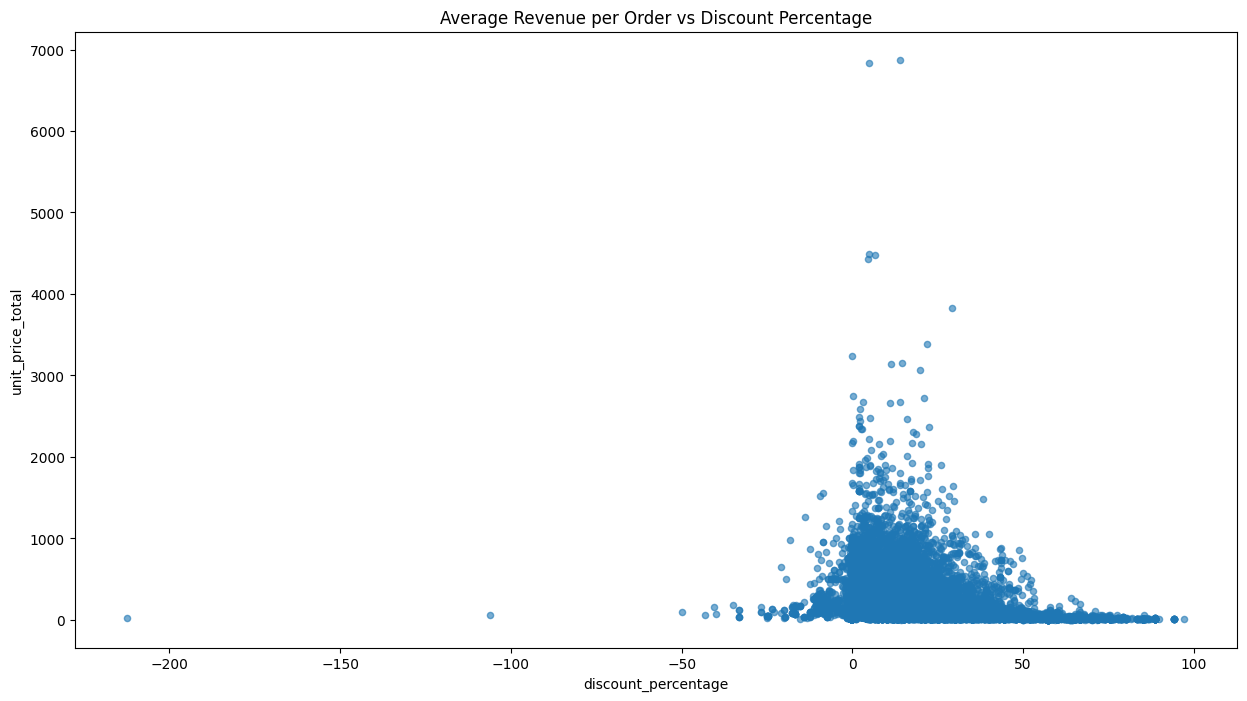

In [59]:
order_revenue.plot(
    kind='scatter',
    x='discount_percentage',
    y='unit_price_total',
    alpha=0.6,
    figsize=(15,8),
    title='Average Revenue per Order vs Discount Percentage'
);

In [60]:
order_revenue['discount_bin'] = pd.cut(order_revenue['discount_percentage'], bins=range(0, 101, 10), right=False)
bin_labels = [f"{i}-{i+10}%" for i in range(0, 100, 10)]
order_revenue['discount_bin'] = pd.cut(order_revenue['discount_percentage'], bins=range(0, 101, 10), labels=bin_labels)
summary = order_revenue.groupby('discount_bin').agg({
    'unit_price_total': 'mean',   # avg revenue per order
    'id_order': 'count'           # number of orders
}).rename(columns={'unit_price_total':'avg_revenue','id_order':'order_count'}).reset_index()


#revenue_by_bin = order_revenue.groupby('discount_bin')['unit_price_total'].mean()
#revenue_by_bin

# revenue_by_bin.plot(kind='line', marker='o', title='Avg Revenue per Order by Discount Bin')
#revenue_by_bin.plot(kind='box', x='discount_bin', y='unit_price_total', title='Avg Revenue per Order by Discount Bin')

/tmp/ipython-input-4076128173.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = order_revenue.groupby('discount_bin').agg({


In [61]:
summary

,discount_bin,avg_revenue,order_count
0,0-10%,302.67,7699
1,10-20%,192.24,11547
2,20-30%,123.44,8117
3,30-40%,80.45,3179
4,40-50%,57.16,2036
5,50-60%,32.02,1120
6,60-70%,23.70,962
7,70-80%,19.19,304
8,80-90%,8.37,121
9,90-100%,7.58,10


In [62]:
summary

,discount_bin,avg_revenue,order_count
0,0-10%,302.67,7699
1,10-20%,192.24,11547
2,20-30%,123.44,8117
3,30-40%,80.45,3179
4,40-50%,57.16,2036
5,50-60%,32.02,1120
6,60-70%,23.70,962
7,70-80%,19.19,304
8,80-90%,8.37,121
9,90-100%,7.58,10


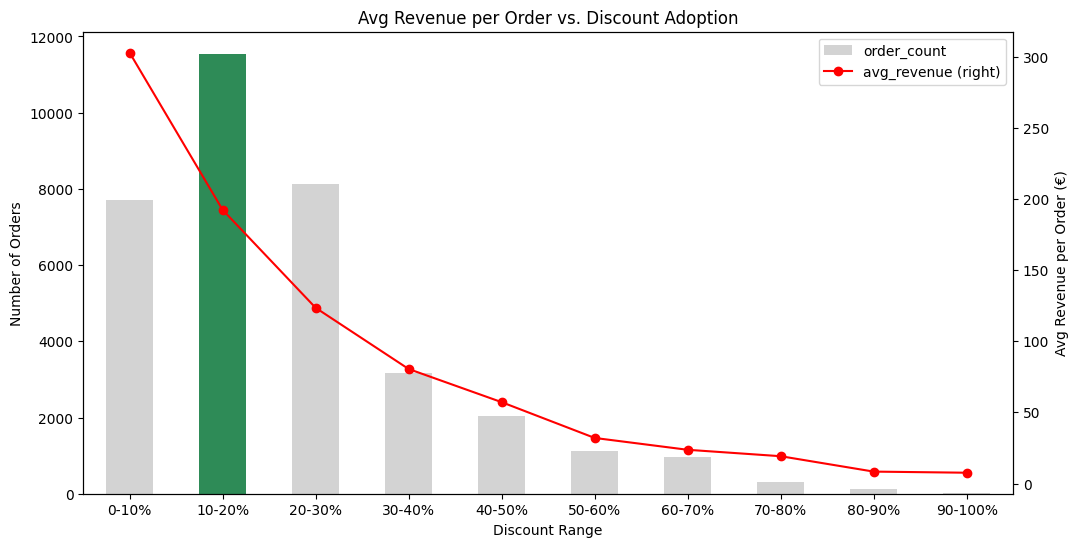

In [63]:
colors_highlight = ['lightgrey','seagreen','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey','lightgrey']

ax = summary.plot(
    x='discount_bin',
    y='order_count',
    kind='bar',
    figsize=(12,6),
    legend=True,
    color=colors_highlight
)

# Secondary axis for avg.revenue per order
summary.plot(
    x='discount_bin',
    y='avg_revenue',
    kind='line',
    marker='o',
    color='red',
    ax=ax,
    secondary_y=True,
    legend=True
)

# Labels & title
ax.set_xlabel('Discount Range')
ax.set_ylabel('Number of Orders')
ax.right_ax.set_ylabel('Avg Revenue per Order (€)')
ax.set_title('Avg Revenue per Order vs. Discount Adoption');

Highlighting 'Sweet spot':

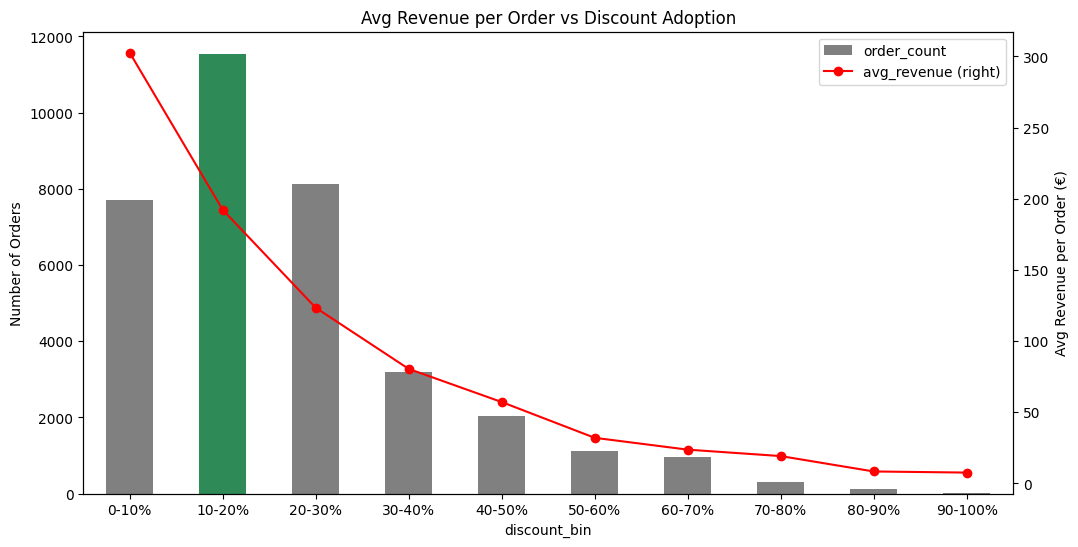

In [64]:
colors = ['grey' if str(bin) not in ['10-20%'] else 'seagreen'
          for bin in summary['discount_bin']]

ax = summary.plot(
    x='discount_bin',
    y='order_count',
    kind='bar',
    figsize=(12,6),
    color=colors,
    legend=True
)

summary.plot(
    x='discount_bin',
    y='avg_revenue',
    kind='line',
    marker='o',
    color='red',
    ax=ax,
    secondary_y=True,
    legend=True
)

ax.set_ylabel('Number of Orders')
ax.right_ax.set_ylabel('Avg Revenue per Order (€)')
ax.set_title('Avg Revenue per Order vs Discount Adoption');

# Legends
#ax.legend(['Avg Revenue per Order'], loc='center right')
#ax.right_ax.legend(['Number of Orders'], loc='upper right')

/tmp/ipython-input-2550622227.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


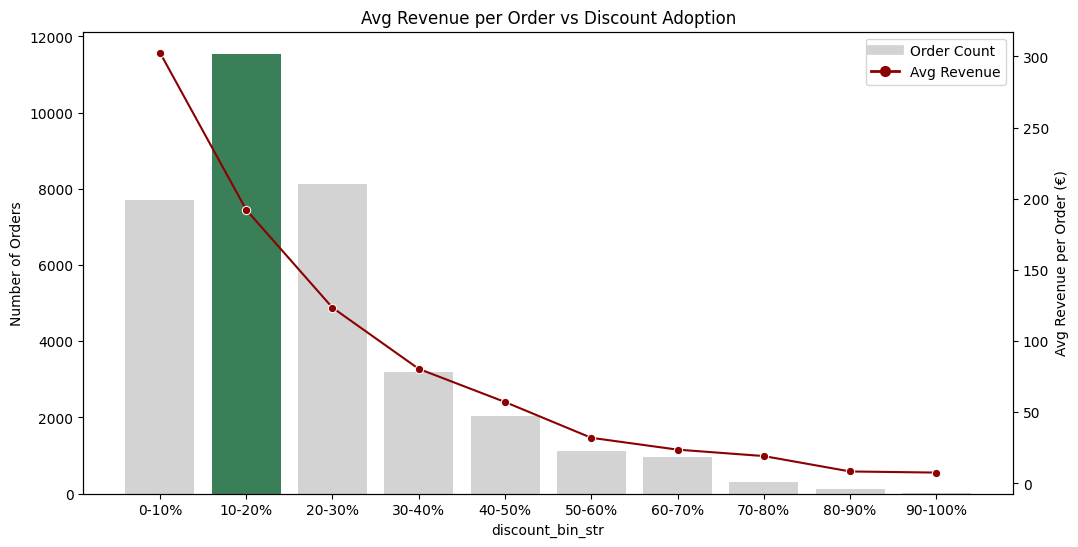

In [65]:
summary['discount_bin_str'] = summary['discount_bin'].astype(str)

# 🎯 Colors: grey for all bins, green highlight for (10, 20]
colors = ['lightgrey' if bin != '10-20%' else 'seagreen'
          for bin in summary['discount_bin_str']]

# --- Plot setup ---
fig, ax1 = plt.subplots(figsize=(12,6))

# Barplot: order_count per discount_bin
sns.barplot(
    data=summary,
    x="discount_bin_str",
    y="order_count",
    palette=colors,
    ax=ax1
)

# Secondary axis for avg_revenue
ax2 = ax1.twinx()
sns.lineplot(
    data=summary,
    x="discount_bin_str",
    y="avg_revenue",
    marker="o",
    color="darkred",
    ax=ax2
)

# --- Labels & title ---
ax1.set_ylabel("Number of Orders")
ax2.set_ylabel("Avg Revenue per Order (€)")
ax1.set_title("Avg Revenue per Order vs Discount Adoption")

bar_patch = plt.Line2D([0], [0], color='lightgrey', lw=7, label='Order Count')  # match your palette
line_patch = plt.Line2D([0], [0], marker='o', color='darkred', label='Avg Revenue', markersize=7, lw=2)

ax1.legend(handles=[bar_patch, line_patch], loc='upper right')

plt.show()

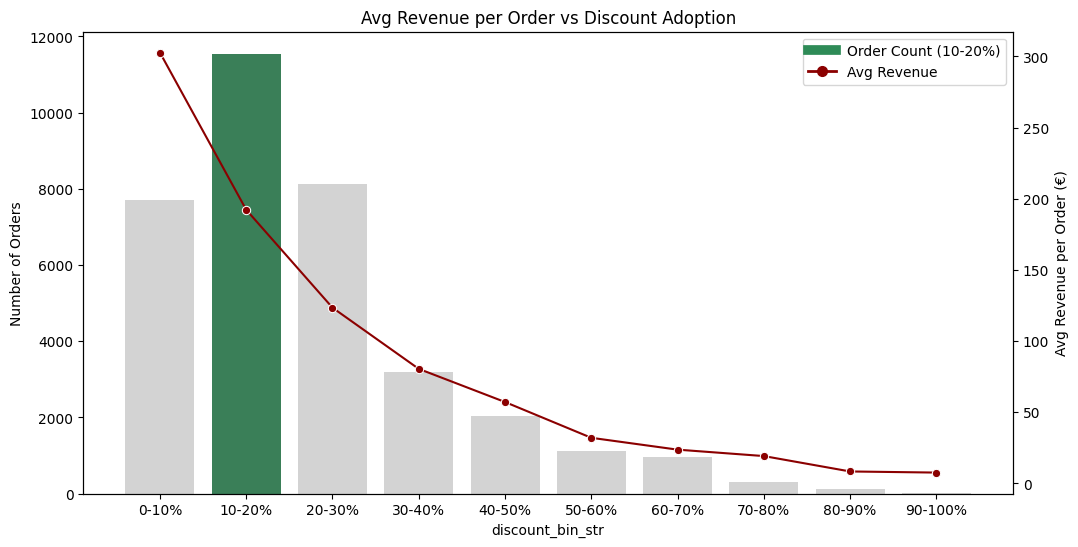

In [66]:
# Create a highlight column
summary['highlight'] = summary['discount_bin_str'].apply(lambda x: 'sweet spot' if x=='10-20%' else 'other')

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(
    data=summary,
    x='discount_bin_str',
    y='order_count',
    hue='highlight',
    dodge=False,  # ensure bars are not split
    palette={'sweet spot':'seagreen', 'other':'lightgrey'},
    ax=ax1
)

# Remove Seaborn hue legend
ax1.legend_.remove()

# Secondary axis for avg revenue
ax2 = ax1.twinx()
sns.lineplot(
    data=summary,
    x='discount_bin_str',
    y='avg_revenue',
    marker='o',
    color='darkred',
    ax=ax2
)

# Labels & title
ax1.set_ylabel("Number of Orders")
ax2.set_ylabel("Avg Revenue per Order (€)")
ax1.set_title("Avg Revenue per Order vs Discount Adoption")

# Custom legend
bar_patch = plt.Line2D([0], [0], color='seagreen', lw=7, label='Order Count (10-20%)')
line_patch = plt.Line2D([0], [0], marker='o', color='darkred', label='Avg Revenue', markersize=7, lw=2)
ax1.legend(handles=[bar_patch, line_patch], loc='upper right')

plt.show()

“When we look at total orders vs. total revenue, they move proportionally, so volume growth drives revenue. But when we isolate discounts, we see a different picture.

Our analysis shows that 92% of orders use discounts — so they definitely encourage purchases. However, the average revenue per order decreases as discounts increase. This means we’re selling more, but earning less per order.

In short: discounts are effective at boosting order numbers, but they may not be beneficial to overall profitability. To confirm, we’d need to compare revenue growth with margin loss from discounts.”

“Here’s the average revenue per order by discount range (line) and the number of orders (bar). Notice that in the 10–20% discount range — highlighted here — orders increase without revenue per order falling too sharply. This could be our optimal discount range or ‘sweet spot.’”

Yes, discounts drive order growth.

No, higher discounts don’t improve per-order revenue — they may even reduce it.

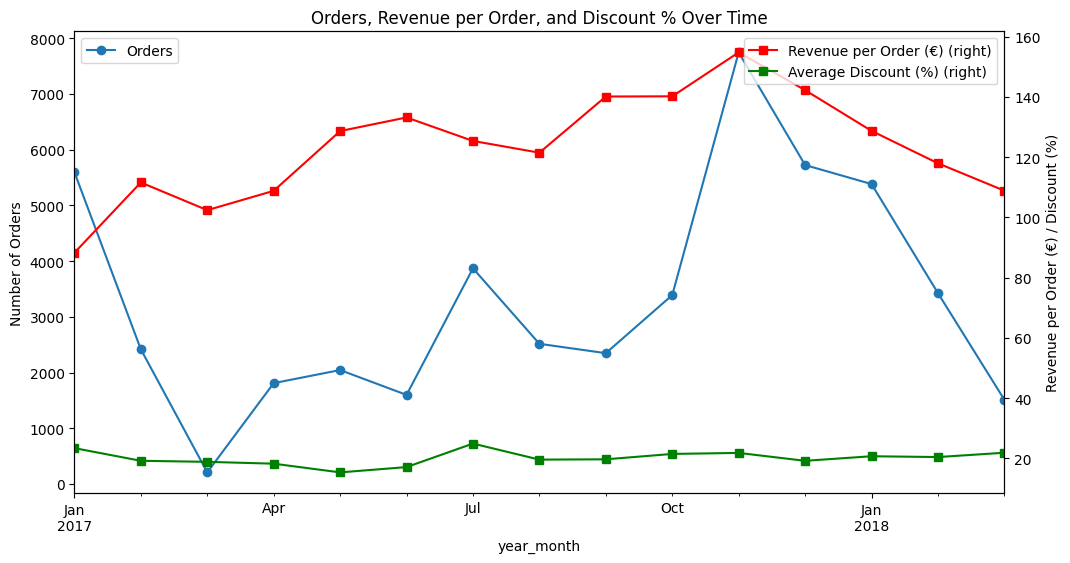

In [67]:
monthly = orderlines_product.groupby('year_month').agg({
    'id_order':'count',
    'unit_price_total':'sum',
    'discount_percentage':'mean'
}).reset_index()

# Calculate revenue per order
monthly['revenue_per_order'] = monthly['unit_price_total'] / monthly['id_order']

# Plot
ax = monthly.plot(
    x='year_month',
    y='id_order',
    kind='line',
    marker='o',
    figsize=(12,6),
    label='Orders'
)

monthly.plot(
    x='year_month',
    y=['revenue_per_order','discount_percentage'],
    kind='line',
    marker='s',
    ax=ax,
    secondary_y=True,
    color=['red','green'],
    label=['Revenue per Order (€)','Average Discount (%)']
)

# Axis labels and title
ax.set_ylabel('Number of Orders')
ax.right_ax.set_ylabel('Revenue per Order (€) / Discount (%)')
ax.set_title('Orders, Revenue per Order, and Discount % Over Time')

# Legends
ax.legend(loc='upper left')
ax.right_ax.legend(loc='upper right')

In [68]:
orderlines_product

,id,id_order,product_quantity,sku,name,date,in_stock,unit_price,price,unit_price_total,discount,discount_percentage,year_month
0,1119116,299545,1,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,2017-01-01 01:46:16,1,47.49,60.99,47.49,13.50,22.13,2017-01
1,1119119,299546,1,IOT0014,iOttie Easy View 2 Car Black Support,2017-01-01 01:50:34,0,18.99,22.95,18.99,3.96,17.25,2017-01
2,1119120,295347,1,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,2017-01-01 01:54:11,1,72.19,89.00,72.19,16.81,18.89,2017-01
3,1119134,299556,1,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,2017-01-01 02:20:14,0,60.90,76.99,60.90,16.09,20.90,2017-01
4,1119154,299563,1,BEA0065,Solo3 Beats Headphones Wireless On-Ear Rose Gold,2017-01-01 02:42:05,0,256.49,299.95,256.49,43.46,14.49,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49593,1649447,527035,1,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:42:41,1,9.99,25.00,9.99,15.01,60.04,2018-03
49594,1649512,527070,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:01,1,9.99,25.00,19.98,15.01,60.04,2018-03
49595,1649522,527074,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:36,1,9.99,25.00,19.98,15.01,60.04,2018-03
49596,1649565,527096,3,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:54:35,1,9.99,25.00,29.97,15.01,60.04,2018-03


In [69]:
products_category

,sku,name,desc,price,in_stock,type,long,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,Rain Design,others
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,Apple,computer_accessories
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,Apple,computer_accessories
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,Apple,audio_headphones
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,Kingston,computer_accessories
...,...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,Belkin,smartwatches_cameras_printers
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Thule,others
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Thule,others
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,Thule,others


In [70]:
category_revenue_disc = orders_product_category.groupby('category').agg(
    {'unit_price_total':'sum',
     'id_order':'count',
     'discount_percentage':'mean'}).sort_values(by='unit_price_total', ascending=False).reset_index()

In [71]:
category_revenue_disc

,category,unit_price_total,id_order,discount_percentage
0,computer_accessories,2753481.03,17654,17.25
1,smartphones,1063821.86,1812,8.05
2,others,657448.13,9992,20.79
3,audio_headphones,415581.07,6393,29.57
4,tablets,398812.75,725,7.18
5,servers,357192.29,915,6.25
6,smartwatches_cameras_printers,298649.24,3718,18.73
7,protection_accessories,151104.84,5347,31.43
8,electronics_accessories,145147.74,2880,21.71
9,computers,88159.62,116,13.86


In [72]:
short_names = {
    'computer_accessories': 'Comp.Acc.',
    'smartphones': 'Phones',
    'others': 'Others',
    'audio_headphones': 'Audio',
    'tablets': 'Tablets',
    'servers': 'Servers',
    'smartwatches_cameras_printers': 'Wearables & Imaging',
    'protection_accessories': 'Protection',
    'electronics_accessories': 'Elec.Acc.',
    'computers': 'Computers'
}
category_revenue_disc['category'] = category_revenue_disc['category'].map(short_names)

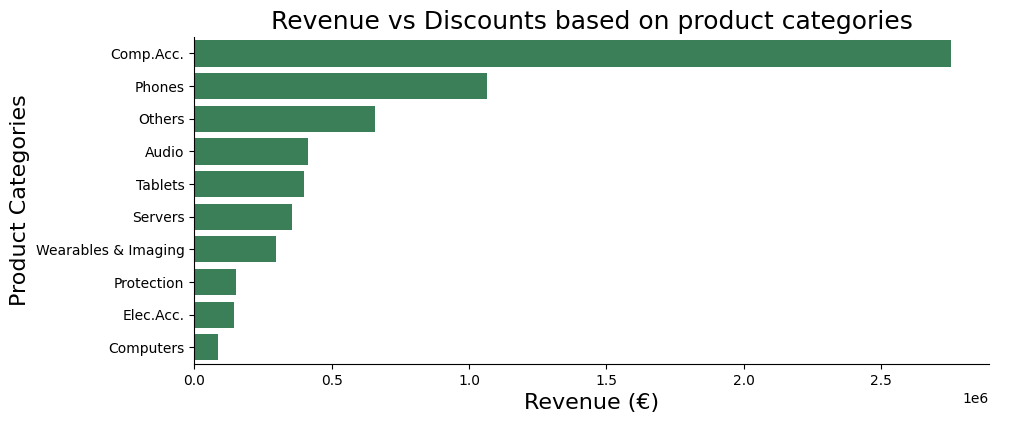

In [73]:
#sns.catplot(data=category_revenue_disc,kind='bar', x='unit_price_total', y='category')

category_plot = sns.catplot(kind="bar",
            data=category_revenue_disc,
            y="category",
            x='unit_price_total',
            color='seagreen',
            height=4,
            aspect=2.5)

category_plot.ax.set_title("Revenue vs Discounts based on product categories",
                     fontsize=18)
category_plot.set_axis_labels("Revenue (€)", "Product Categories", fontsize=16); # meaningful labels and adjusted font size

In [74]:
orders_product_category['price_bin'] = ''

In [75]:
orders_product_category.loc[orders_product_category['price'] <= 50, 'price_bin'] = 'budget'
orders_product_category.loc[(orders_product_category['price'] > 50) & (orders_product_category['price'] <= 300), 'price_bin'] = 'medium'
orders_product_category.loc[(orders_product_category['price'] > 300) & (orders_product_category['price'] <= 1200), 'price_bin'] = 'high-end'
orders_product_category.loc[(orders_product_category['price'] > 1200), 'price_bin'] = 'premium'

In [76]:
orders_product_category.sample(10)

,id,id_order,product_quantity,sku,name,date,in_stock,unit_price,price,unit_price_total,discount,discount_percentage,year_month,category,long,price_bin
13753,1279789,371318,1,SEA0103,"Seagate Barracuda 1TB Hard Drive 25 ""7mm",2017-07-01 20:15:34,1,51.99,69.99,51.99,18.00,25.72,2017-07,computer_accessories,Seagate,medium
41419,1553164,487937,1,BEL0198,Belkin Rockstar Road 4 USB Car Charger 7.2A Black,2018-01-10 18:28:07,1,15.99,34.99,15.99,19.00,54.30,2018-01,audio_headphones,Belkin,budget
37306,1512325,470197,1,WAC0229,Education - Wacom Intuos Creative 3D Pen & Tou...,2017-12-23 11:53:39,0,160.99,199.99,160.99,39.00,19.50,2017-12,others,Wacom,medium
7573,1184709,325943,1,THU0043,"Thule Stróvan Sleeve Case MacBook 13 ""(Air Pro...",2017-02-18 12:10:53,0,39.99,49.95,39.99,9.96,19.94,2017-02,protection_accessories,Thule,budget
26093,1397184,421694,1,APP1919,Apple Thunderbolt Adapter 3 / USB-C Thunderbol...,2017-11-04 11:16:25,1,55.99,59.00,55.99,3.01,5.10,2017-11,electronics_accessories,Apple,medium
36099,1503505,466091,1,APP1782,Apple Watch Series 1 42mm Aluminum Silver Case...,2017-12-18 20:16:16,0,293.00,299.00,293.00,6.00,2.01,2017-12,computer_accessories,Apple,medium
26312,1398966,422653,1,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,2017-11-06 16:11:12,1,49.99,60.99,49.99,11.00,18.04,2017-11,others,OWC,medium
33447,1469505,452465,1,SNN0062,Sonnet eGFX Breakaway Box 550W PCIe Thunderbol...,2017-11-30 10:03:13,1,399.99,422.29,399.99,22.30,5.28,2017-11,computer_accessories,Sonnet,high-end
23705,1378275,412633,1,NTE0062,"NewerTech NuPower Battery 65W MacBook Pro 13 ""...",2017-10-15 11:17:53,1,105.99,131.99,105.99,26.00,19.70,2017-10,others,NewerTech,medium
37524,1514675,471326,1,SHE0044,SwitchEasy iPhone Case 0.35 8/7 White,2017-12-25 19:09:30,0,2.99,9.99,2.99,7.00,70.07,2017-12,protection_accessories,SwitchEasy,budget


In [77]:
orders_product_category

,id,id_order,product_quantity,sku,name,date,in_stock,unit_price,price,unit_price_total,discount,discount_percentage,year_month,category,long,price_bin
0,1119116,299545,1,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,2017-01-01 01:46:16,1,47.49,60.99,47.49,13.50,22.13,2017-01,others,OWC,medium
1,1119119,299546,1,IOT0014,iOttie Easy View 2 Car Black Support,2017-01-01 01:50:34,0,18.99,22.95,18.99,3.96,17.25,2017-01,others,iOttie,budget
2,1119120,295347,1,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,2017-01-01 01:54:11,1,72.19,89.00,72.19,16.81,18.89,2017-01,audio_headphones,Apple,medium
3,1119134,299556,1,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,2017-01-01 02:20:14,0,60.90,76.99,60.90,16.09,20.90,2017-01,computer_accessories,Crucial,medium
4,1119154,299563,1,BEA0065,Solo3 Beats Headphones Wireless On-Ear Rose Gold,2017-01-01 02:42:05,0,256.49,299.95,256.49,43.46,14.49,2017-01,audio_headphones,Beats,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49593,1649447,527035,1,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:42:41,1,9.99,25.00,9.99,15.01,60.04,2018-03,audio_headphones,Apple,budget
49594,1649512,527070,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:01,1,9.99,25.00,19.98,15.01,60.04,2018-03,audio_headphones,Apple,budget
49595,1649522,527074,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:36,1,9.99,25.00,19.98,15.01,60.04,2018-03,audio_headphones,Apple,budget
49596,1649565,527096,3,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:54:35,1,9.99,25.00,29.97,15.01,60.04,2018-03,audio_headphones,Apple,budget


In [78]:
summary_price = orders_product_category.groupby('price_bin').agg({'unit_price_total':'sum','id_order':'count','discount_percentage':'mean'}).rename(columns={
    "unit_price_total": "Revenue (€)",
    "id_order": "Orders",
    "discount_percentage": "Avg Discount (%)"
}).reset_index()
summary_price

,price_bin,Revenue (€),Orders,Avg Discount (%)
0,budget,458824.89,18427,26.28
1,high-end,2989114.13,5945,8.80
2,medium,2875900.50,25219,19.54
3,premium,5975.06,7,36.84


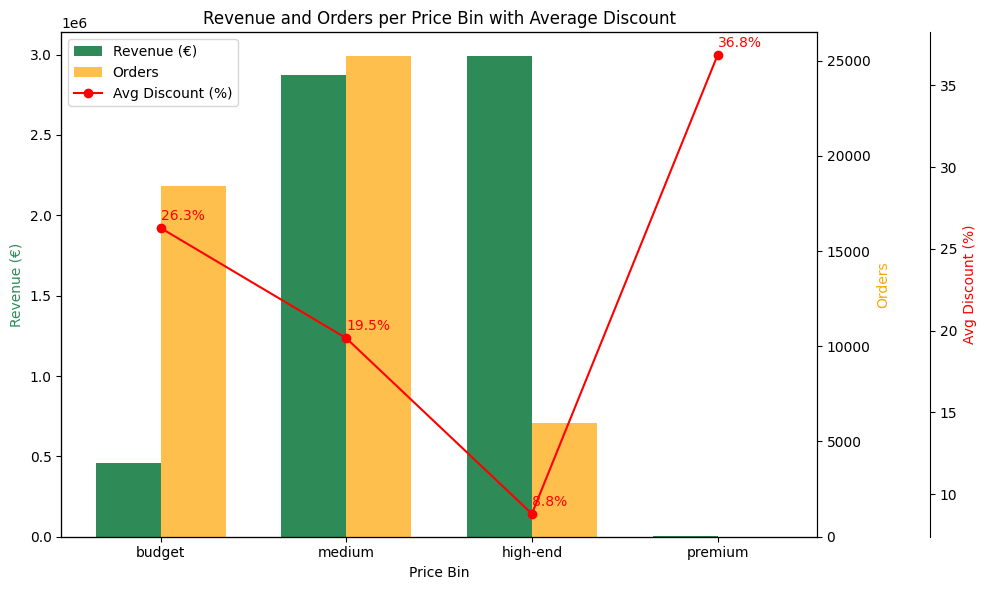

In [127]:
bin_order = ['budget', 'medium', 'high-end', 'premium']
summary_price['price_bin'] = pd.Categorical(summary_price['price_bin'], categories=bin_order, ordered=True)
summary_price = summary_price.sort_values('price_bin')

# Plot setup
x = np.arange(len(summary_price))  # positions for each category
width = 0.35  # width of the bars

fig, ax1 = plt.subplots(figsize=(10,6))

# Bars for Revenue
bar1 = ax1.bar(x - width/2, summary_price['Revenue (€)'], width, label='Revenue (€)', color='seagreen')

# Bars for Orders on the same axis but with different scale
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, summary_price['Orders'], width, label='Orders', color='orange', alpha=0.7)


# Optional: Line for Avg Discount
ax3 = ax1.twinx()  # another y-axis for discount
ax3.spines["right"].set_position(("axes", 1.15))  # move it to the right
line = ax3.plot(x, summary_price['Avg Discount (%)'], color='red', marker='o', label='Avg Discount (%)')

# Add labels on top of bars for discount (optional)
for i, discount in enumerate(summary_price['Avg Discount (%)']):
    ax3.text(x[i], discount + 0.5, f"{discount:.1f}%", ha='left', va='baseline', color='red')

# X-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(summary_price['price_bin'])
ax1.set_xlabel("Price Bin")

# Y-axis labels
ax1.set_ylabel("Revenue (€)", color='seagreen')
ax2.set_ylabel("Orders", color='orange')
ax3.set_ylabel("Avg Discount (%)", color='red')

# Legends
bars_labels = [bar.get_label() for bar in [bar1, bar2]]
ax1.legend([bar1, bar2, line[0]], ['Revenue (€)', 'Orders', 'Avg Discount (%)'], loc='upper left')

plt.title("Revenue and Orders per Price Bin with Average Discount")
plt.tight_layout()
plt.show()

In [79]:
orders_product_category['discount_percentage_clipped'] = orders_product_category['discount_percentage'].clip(lower=0)

In [80]:
orders_no_discounts = orders_product_category[orders_product_category['discount_percentage'] > 0]
orders_no_discounts

,id,id_order,product_quantity,sku,name,date,in_stock,unit_price,price,unit_price_total,discount,discount_percentage,year_month,category,long,price_bin,discount_percentage_clipped
0,1119116,299545,1,OWC0100,OWC In-line Digital Temperature Sensor Kit HDD...,2017-01-01 01:46:16,1,47.49,60.99,47.49,13.50,22.13,2017-01,others,OWC,medium,22.13
1,1119119,299546,1,IOT0014,iOttie Easy View 2 Car Black Support,2017-01-01 01:50:34,0,18.99,22.95,18.99,3.96,17.25,2017-01,others,iOttie,budget,17.25
2,1119120,295347,1,APP0700,Apple 85W MagSafe 2 charger MacBook Pro screen...,2017-01-01 01:54:11,1,72.19,89.00,72.19,16.81,18.89,2017-01,audio_headphones,Apple,medium,18.89
3,1119134,299556,1,CRU0039-A,(Open) Crucial 240GB SSD 7mm BX200,2017-01-01 02:20:14,0,60.90,76.99,60.90,16.09,20.90,2017-01,computer_accessories,Crucial,medium,20.90
4,1119154,299563,1,BEA0065,Solo3 Beats Headphones Wireless On-Ear Rose Gold,2017-01-01 02:42:05,0,256.49,299.95,256.49,43.46,14.49,2017-01,audio_headphones,Beats,medium,14.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49593,1649447,527035,1,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:42:41,1,9.99,25.00,9.99,15.01,60.04,2018-03,audio_headphones,Apple,budget,60.04
49594,1649512,527070,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:01,1,9.99,25.00,19.98,15.01,60.04,2018-03,audio_headphones,Apple,budget,60.04
49595,1649522,527074,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:36,1,9.99,25.00,19.98,15.01,60.04,2018-03,audio_headphones,Apple,budget,60.04
49596,1649565,527096,3,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:54:35,1,9.99,25.00,29.97,15.01,60.04,2018-03,audio_headphones,Apple,budget,60.04


In [101]:
min_keep_all = 20  # bins with <=20 points will keep all

def conditional_sample(group, frac=0.3, min_keep_all=20):
    if len(group) <= min_keep_all:
        return group  # keep all points
    else:
        return group.sample(frac=frac, random_state=42)

# Apply to each price_bin
sampled_data = orders_product_category.groupby('price_bin', group_keys=False).apply(
    lambda x: conditional_sample(x, frac=0.1, min_keep_all=7)
)

/tmp/ipython-input-1716806769.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = orders_product_category.groupby('price_bin', group_keys=False).apply(


In [102]:


sampled_data["order_number"] = range(1, len(sampled_data) + 1)  # running count
sampled_data

,id,id_order,product_quantity,sku,name,date,in_stock,unit_price,price,unit_price_total,discount,discount_percentage,year_month,category,long,price_bin,discount_percentage_clipped,order_number
11513,1253280,358404,1,SAN0113,SanDisk Ultra Flair Flash Drive 128GB USB 3.0,2017-05-23 14:29:52,0,43.99,49.99,43.99,6.00,12.00,2017-05,computer_accessories,SanDisk,Budget,12.00,1
27361,1408477,427236,1,ADN0019,Adonit Jot Pro Disc Replacement Flip mini and ...,2017-11-15 16:54:22,1,7.99,7.99,7.99,0.00,0.00,2017-11,others,Adonit,Budget,0.00,2
23669,1377958,412471,1,SPE0189,"Speck Case SmartShell MacBook Pro 13 ""(Late 20...",2017-10-14 14:45:46,0,39.99,49.99,39.99,10.00,20.00,2017-10,protection_accessories,Spek SeeThru,Budget,20.00,3
17027,1305399,383427,1,TUC0331,"Forte Backpack Tucano MacBook Pro 13 ""and 15"" ...",2017-07-28 16:46:35,0,19.99,39.90,19.99,19.91,49.90,2017-07,others,Tucano,Budget,49.90,4
17441,1308011,384639,1,IFX0054,iFixit Cable Bracket hard drive without MacBoo...,2017-07-31 17:34:14,1,39.99,39.95,39.99,-0.04,-0.10,2017-07,audio_headphones,iFixit,Budget,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16283,1299135,380514,1,PAC0595,Apple Mac mini Core i5 14GHz | 8GB RAM | 1TB SSD,2017-07-21 17:39:38,0,930.00,1395.59,930.00,465.59,33.36,2017-07,computers,Pack,Premium,33.36,4962
16463,1300702,381251,1,AP20028,"Like new - Apple iMac 215 ""Core i5 Quad-Core 1...",2017-07-24 10:36:26,1,909.00,1279.00,909.00,370.00,28.93,2017-07,computers,Apple,Premium,28.93,4963
16464,1300703,381251,1,AP20030,"Apple iMac 215 ""Core i5 Quad-Core 16GHz | 8GB ...",2017-07-24 10:36:31,0,894.00,1279.00,894.00,385.00,30.10,2017-07,computers,Apple,Premium,30.10,4964
16525,1301142,372596,1,PAC1472,OWC ThunderBay 4 Thunderbolt 2 | Seagate Deskt...,2017-07-24 17:05:28,0,997.49,1233.95,997.49,236.46,19.16,2017-07,computer_accessories,Pack,Premium,19.16,4965


In [103]:
sampled_data

,id,id_order,product_quantity,sku,name,date,in_stock,unit_price,price,unit_price_total,discount,discount_percentage,year_month,category,long,price_bin,discount_percentage_clipped,order_number
11513,1253280,358404,1,SAN0113,SanDisk Ultra Flair Flash Drive 128GB USB 3.0,2017-05-23 14:29:52,0,43.99,49.99,43.99,6.00,12.00,2017-05,computer_accessories,SanDisk,Budget,12.00,1
27361,1408477,427236,1,ADN0019,Adonit Jot Pro Disc Replacement Flip mini and ...,2017-11-15 16:54:22,1,7.99,7.99,7.99,0.00,0.00,2017-11,others,Adonit,Budget,0.00,2
23669,1377958,412471,1,SPE0189,"Speck Case SmartShell MacBook Pro 13 ""(Late 20...",2017-10-14 14:45:46,0,39.99,49.99,39.99,10.00,20.00,2017-10,protection_accessories,Spek SeeThru,Budget,20.00,3
17027,1305399,383427,1,TUC0331,"Forte Backpack Tucano MacBook Pro 13 ""and 15"" ...",2017-07-28 16:46:35,0,19.99,39.90,19.99,19.91,49.90,2017-07,others,Tucano,Budget,49.90,4
17441,1308011,384639,1,IFX0054,iFixit Cable Bracket hard drive without MacBoo...,2017-07-31 17:34:14,1,39.99,39.95,39.99,-0.04,-0.10,2017-07,audio_headphones,iFixit,Budget,0.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16283,1299135,380514,1,PAC0595,Apple Mac mini Core i5 14GHz | 8GB RAM | 1TB SSD,2017-07-21 17:39:38,0,930.00,1395.59,930.00,465.59,33.36,2017-07,computers,Pack,Premium,33.36,4962
16463,1300702,381251,1,AP20028,"Like new - Apple iMac 215 ""Core i5 Quad-Core 1...",2017-07-24 10:36:26,1,909.00,1279.00,909.00,370.00,28.93,2017-07,computers,Apple,Premium,28.93,4963
16464,1300703,381251,1,AP20030,"Apple iMac 215 ""Core i5 Quad-Core 16GHz | 8GB ...",2017-07-24 10:36:31,0,894.00,1279.00,894.00,385.00,30.10,2017-07,computers,Apple,Premium,30.10,4964
16525,1301142,372596,1,PAC1472,OWC ThunderBay 4 Thunderbolt 2 | Seagate Deskt...,2017-07-24 17:05:28,0,997.49,1233.95,997.49,236.46,19.16,2017-07,computer_accessories,Pack,Premium,19.16,4965


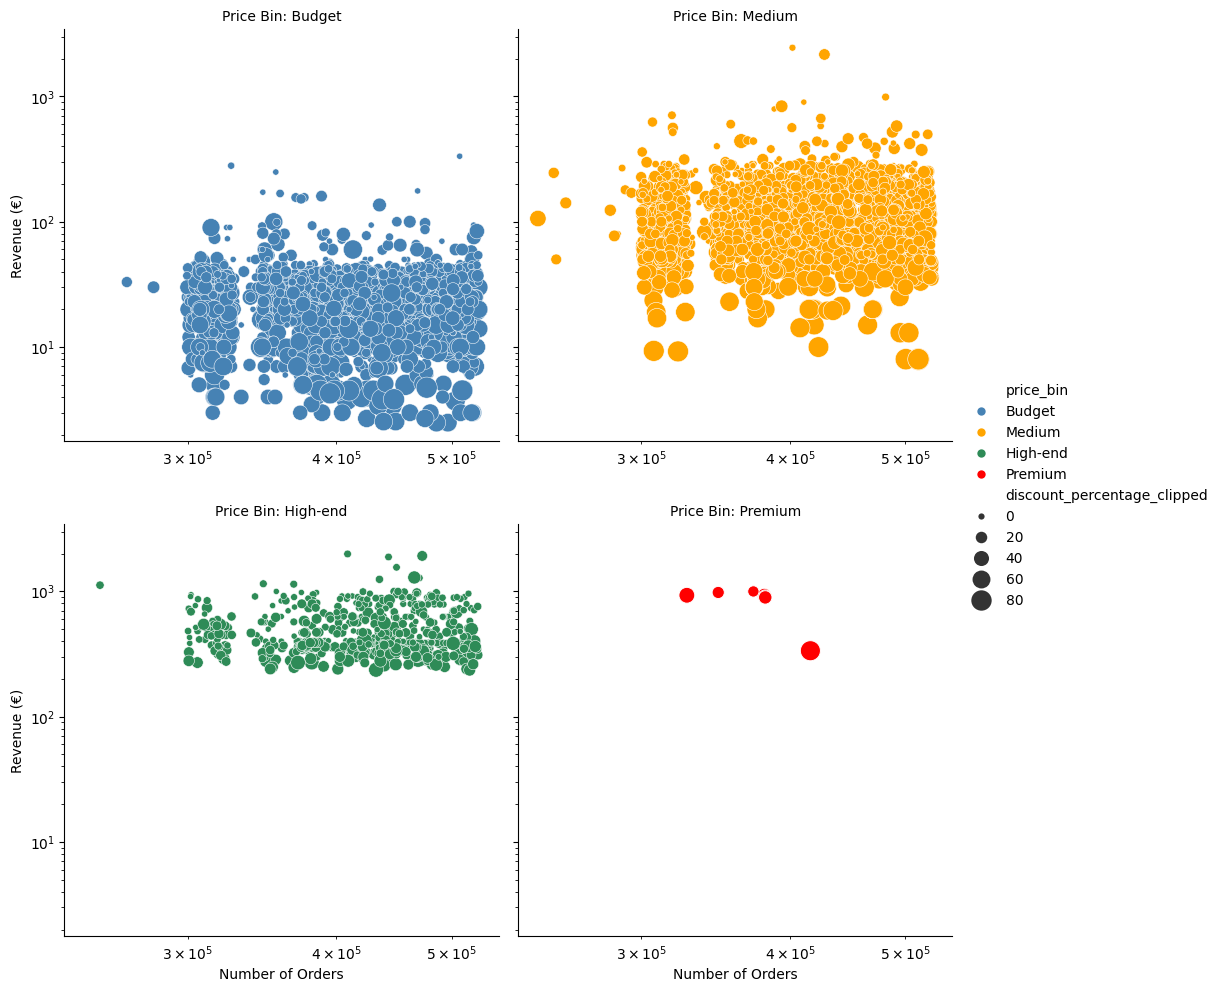

In [106]:
# Desired order
bin_order = ["Budget", "Medium", "High-end", "Premium"]

color_price_bin = {'Budget':'steelblue','Medium':'orange','High-end':'seagreen','Premium':'red'}

# Convert to categorical with that order
sampled_data['price_bin'] = pd.Categorical(
    sampled_data['price_bin'],
    categories=bin_order,
    ordered=True
)

g = sns.relplot(
    data=sampled_data,
    x="id_order",
    y="unit_price_total",
    size="discount_percentage_clipped",
    col="price_bin",
    col_wrap=2,
    kind="scatter",
    height=5,
    aspect=1,
    sizes=(20, 250),
    hue="price_bin",  # shade by discount
    palette=color_price_bin,
)

# Set log scale for better visual spread
for ax in g.axes.flat:
    ax.set_yscale('log')  # revenue
    ax.set_xscale('log')  # number of orders, if needed

g.set_axis_labels("Number of Orders", "Revenue (€)")
g.set_titles("Price Bin: {col_name}")
g.fig.subplots_adjust(hspace=0.2)
plt.show()

/tmp/ipython-input-3665626781.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Greys')  # grayscale for intensity reference
/tmp/ipython-input-3665626781.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


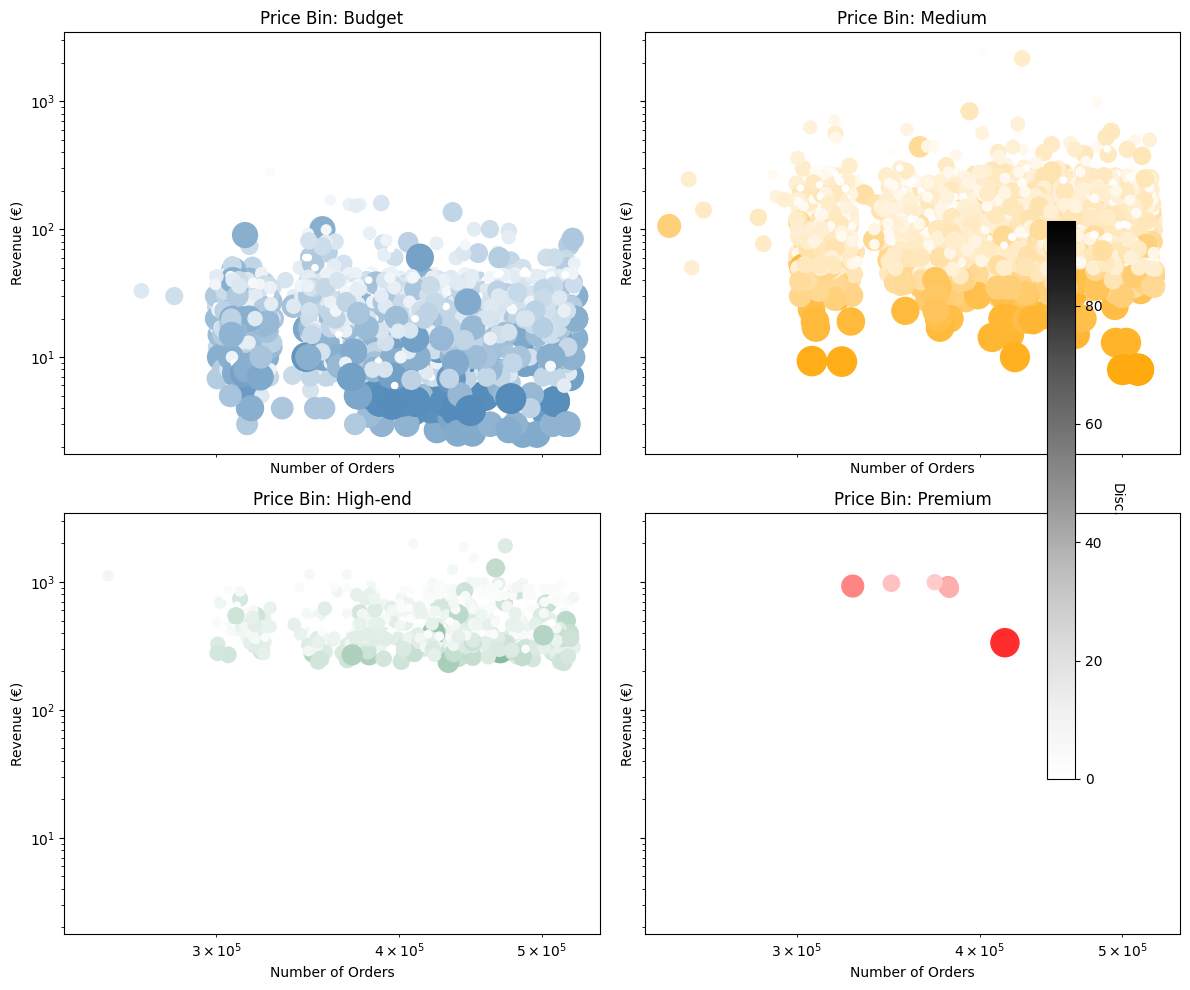

In [110]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Desired order
bin_order = ["Budget", "Medium", "High-end", "Premium"]

# Base colors for each bin
color_price_bin = {'Budget':'steelblue','Medium':'orange','High-end':'seagreen','Premium':'red'}

# Ensure price_bin is categorical
sampled_data['price_bin'] = pd.Categorical(
    sampled_data['price_bin'],
    categories=bin_order,
    ordered=True
)

# Normalize discount percentage to 0-1 for shading
discount_norm = (sampled_data['discount_percentage_clipped'] - sampled_data['discount_percentage_clipped'].min()) / (
    sampled_data['discount_percentage_clipped'].max() - sampled_data['discount_percentage_clipped'].min()
)

# Function to adjust color brightness
def shade_color(base_color, shade_factor):
    rgb = mcolors.to_rgb(base_color)
    # Lerp between white and base_color based on shade_factor
    shaded_rgb = tuple((1 - shade_factor) * 1.0 + shade_factor * c for c in rgb)
    return shaded_rgb

# Create shaded colors based on discount
sampled_data['shaded_color'] = [
    shade_color(color_price_bin[bin_name], factor)
    for bin_name, factor in zip(sampled_data['price_bin'], discount_norm)
]

# Plot manually using a loop over price bins
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10), sharex=True, sharey=True)
axes = axes.flatten()

for i, price_bin in enumerate(bin_order):
    ax = axes[i]
    subset = sampled_data[sampled_data['price_bin'] == price_bin]
    ax.scatter(
        subset['id_order'],
        subset['unit_price_total'],
        s=subset['discount_percentage_clipped']*5 + 20,  # adjust size scale if needed
        color=subset['shaded_color']
    )
    ax.set_title(f"Price Bin: {price_bin}")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("Number of Orders")
    ax.set_ylabel("Revenue (€)")

# Create a colorbar for discount intensity
cmap = cm.get_cmap('Greys')  # grayscale for intensity reference
norm = plt.Normalize(sampled_data['discount_percentage_clipped'].min(), sampled_data['discount_percentage_clipped'].max())
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar

cbar = fig.colorbar(sm, ax=axes, fraction=0.03, pad=0.04)
cbar.set_label("Disc.", rotation=270, labelpad=15)  # Short legend title

plt.tight_layout()
plt.show()

In [87]:
price_plot = orders_product_category

In [88]:
price_bins = orders_product_category['price_bin'].unique()
price_bins

array(['Medium', 'Budget', 'High-end', 'Premium'], dtype=object)

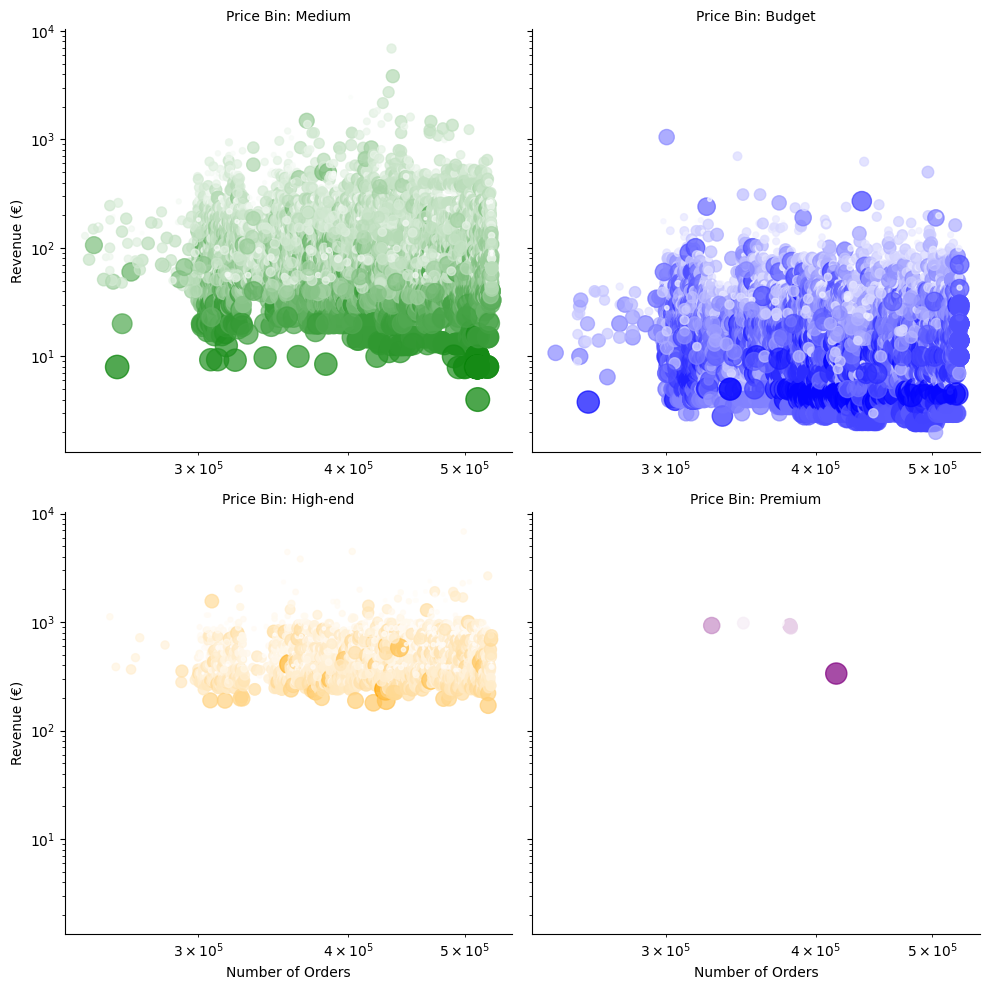

In [89]:
import numpy as np

# Unique price_bins
price_bins = orders_product_category['price_bin'].unique()
base_colors = ['green', 'blue', 'orange', 'purple']
color_map_dict = dict(zip(price_bins, base_colors))

import matplotlib.colors as mcolors

def scatter_shade(data, **kwargs):
    price_bin = data['price_bin'].iloc[0]  # get current facet
    base_color = color_map_dict[price_bin]

    # Normalize discount for shading
    norm = (data['discount_percentage_clipped'] - data['discount_percentage_clipped'].min()) / \
           (data['discount_percentage_clipped'].max() - data['discount_percentage_clipped'].min() + 1e-6)

    cmap = mcolors.LinearSegmentedColormap.from_list('shade', ['white', base_color])
    point_colors = cmap(norm.values)

    plt.scatter(
        data['id_order'],
        data['unit_price_total'],
        s=data['discount_percentage_clipped']*3,  # adjust size scaling
        color=point_colors,
        alpha=0.7
    )
g = sns.FacetGrid(
    orders_product_category,
    col="price_bin",
    col_wrap=2,
    height=5,
    aspect=1
)

g.map_dataframe(scatter_shade)

# Set log scales and labels for each facet
for ax in g.axes.flat:
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("Number of Orders")
    ax.set_ylabel("Revenue (€)")

g.set_titles("Price Bin: {col_name}")
plt.tight_layout()
plt.show()


In [91]:
budget = orders_no_discounts[orders_product_category['price_bin'] == 'Budget']
budget

/tmp/ipython-input-1728951224.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  budget = orders_no_discounts[orders_product_category['price_bin'] == 'Budget']


,id,id_order,product_quantity,sku,name,date,in_stock,unit_price,price,unit_price_total,discount,discount_percentage,year_month,category,long,price_bin,discount_percentage_clipped
1,1119119,299546,1,IOT0014,iOttie Easy View 2 Car Black Support,2017-01-01 01:50:34,0,18.99,22.95,18.99,3.96,17.25,2017-01,others,iOttie,budget,17.25
5,1119155,299564,1,SAT0010,Satechi Aluminum Silver Mouse,2017-01-01 02:43:37,1,18.99,29.99,18.99,11.00,36.68,2017-01,computer_accessories,Satechi,budget,36.68
9,1119202,299586,1,GRT0456,Griffin iTrip Aux Lightning,2017-01-01 09:18:52,0,42.99,44.99,42.99,2.00,4.45,2017-01,others,Griffin,budget,4.45
13,1119287,299623,1,OBL0007,Tapp Oblumi Intelligent thermometer App,2017-01-01 11:29:39,0,37.05,39.95,37.05,2.90,7.26,2017-01,smartwatches_cameras_printers,Oblumi,budget,7.26
18,1119328,297809,1,IFX0016,iFixit Heavy Duty Suction Cups Pack 2 suction ...,2017-01-01 12:01:12,1,14.24,20.99,14.24,6.75,32.16,2017-01,others,iFixit,budget,32.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49593,1649447,527035,1,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:42:41,1,9.99,25.00,9.99,15.01,60.04,2018-03,audio_headphones,Apple,budget,60.04
49594,1649512,527070,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:01,1,9.99,25.00,19.98,15.01,60.04,2018-03,audio_headphones,Apple,budget,60.04
49595,1649522,527074,2,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:49:36,1,9.99,25.00,19.98,15.01,60.04,2018-03,audio_headphones,Apple,budget,60.04
49596,1649565,527096,3,APP0698,Apple Lightning Cable Connector to USB 1m Whit...,2018-03-14 11:54:35,1,9.99,25.00,29.97,15.01,60.04,2018-03,audio_headphones,Apple,budget,60.04


In [ ]:
orders_no_discounts

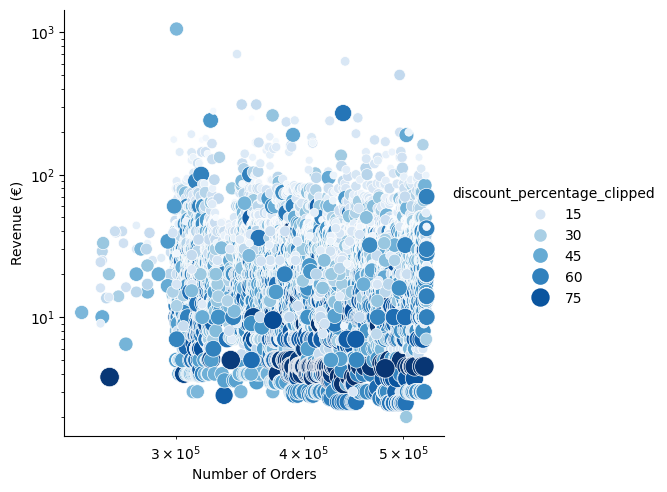

In [92]:
g = sns.relplot(
    data=budget,
    x="id_order",
    y="unit_price_total",
    size="discount_percentage_clipped",
    hue="discount_percentage_clipped",  # shade by discount
    palette="Blues",                   # blue gradient
    kind="scatter",
    height=5,
    aspect=1,
    sizes=(20, 200)
)

# Set log scale for better visual spread
for ax in g.axes.flat:
    ax.set_yscale('log')  # revenue
    ax.set_xscale('log')  # number of orders, if needed

g.set_axis_labels("Number of Orders", "Revenue (€)")
g.set_titles("Budget Products: costs <50€")
plt.show()

In [ ]:
medium = orders_no_discounts[orders_product_category['price_bin'] == 'Medium']
medium

In [ ]:
g = sns.relplot(
    data=medium,
    x="id_order",
    y="unit_price_total",
    size="discount_percentage_clipped",
    hue="discount_percentage_clipped",  # shade by discount
    palette="Oranges",                   # blue gradient
    kind="scatter",
    height=5,
    aspect=1,
    sizes=(20, 200)
)

# Set log scale for better visual spread
for ax in g.axes.flat:
    ax.set_yscale('log')  # revenue
    ax.set_xscale('log')  # number of orders, if needed

g.set_axis_labels("Number of Orders", "Revenue (€)")
g.set_titles("Budget Products: costs <50€")
plt.show()

In [ ]:
high_end = orders_no_discounts[orders_product_category['price_bin'] == 'High-end']
high_end

In [ ]:
highend_summary = high_end.groupby("id_order").agg({
    "unit_price_total": "sum",      # revenue per order
    "discount_percentage_clipped": "mean"  # avg discount per order
}).reset_index()

highend_summary["order_number"] = range(1, len(highend_summary) + 1)  # running count
highend_summary

In [ ]:
g = sns.relplot(
    data=highend_summary,
    x="order_number",
    y="unit_price_total",
    size="discount_percentage_clipped",
    hue="discount_percentage_clipped",  # shade by discount
    palette="Greens",                   # blue gradient
    kind="scatter",
    height=5,
    aspect=1,
    sizes=(20, 200)
)

# Set log scale for better visual spread

g.set_axis_labels("Number of Orders", "Revenue (€)")
g.set_titles("Budget Products: costs <50€")
plt.show()

In [ ]:
premium = orders_no_discounts[orders_product_category['price_bin'] == 'Premium']
premium


In [ ]:
premium_summary = premium.groupby("id_order").agg({
    "unit_price_total": "sum",      # revenue per order
    "discount_percentage_clipped": "mean"  # avg discount per order
}).reset_index()

premium_summary["order_number"] = range(1, len(premium_summary) + 1)  # running count
premium_summary

In [97]:
g = sns.relplot(
    data=premium_summary,
    x="order_number",
    y="unit_price_total",
    size="discount_percentage_clipped",
    hue="discount_percentage_clipped",  # shade by discount
    palette="Reds",                   # blue gradient
    kind="scatter",
    height=5,
    aspect=1,
    sizes=(20, 200)
)

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))  # commas in large numbers
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{int(y):,}"))

g.set_axis_labels("Number of Orders", "Revenue (€)")
g.fig.suptitle("Premium Products: Price ≥ 1200€", fontsize=14, weight="bold")
g.fig.subplots_adjust(top=0.9)
plt.show()

NameError: name 'premium_summary' is not defined

In [ ]:
orders_product_category['price_bin'].value_counts()

In [ ]:
orders_product_category['price_bin'].unique()

In [ ]:
orders_product_category

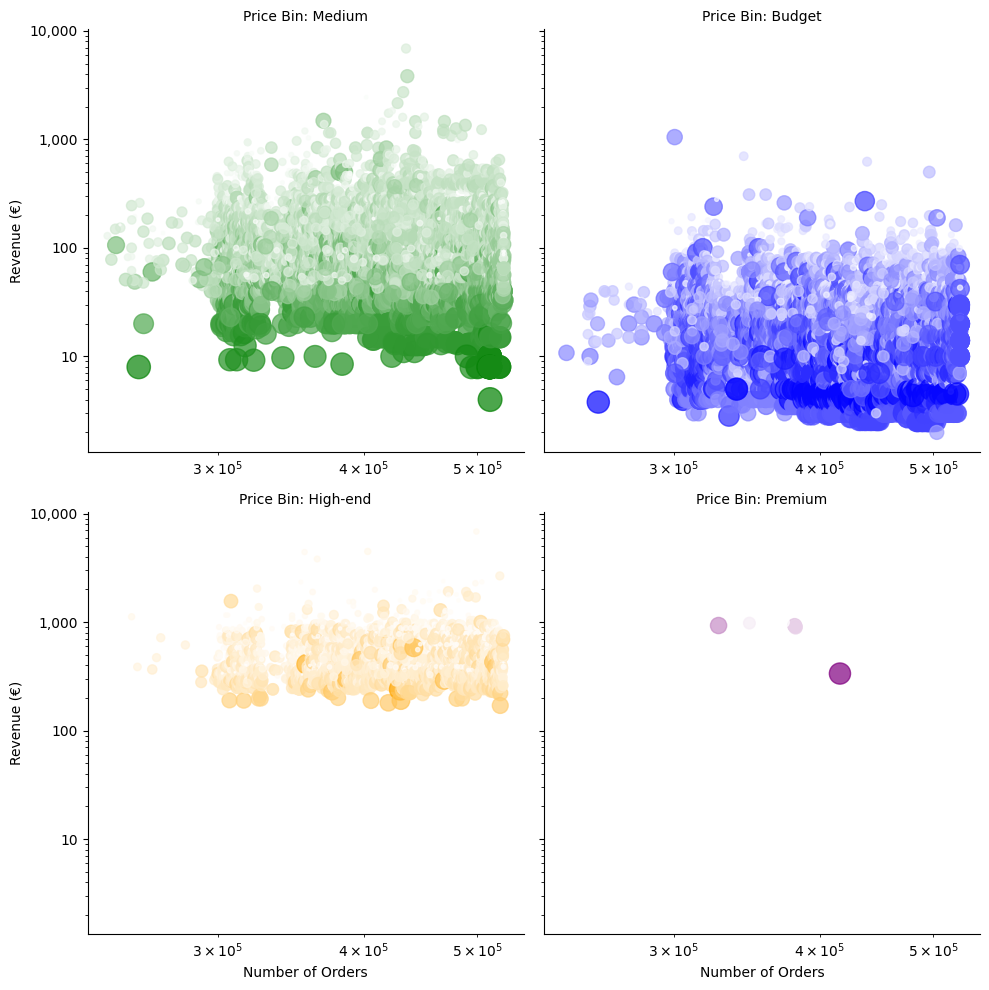

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors
from matplotlib.ticker import FuncFormatter
import numpy as np

# Unique price_bins and base colors
price_bins = orders_product_category['price_bin'].unique()
base_colors = ['green', 'blue', 'orange', 'purple']  # one per price_bin
color_map_dict = dict(zip(price_bins, base_colors))

# Function to plot scatter with shade by discount
def scatter_shade(data, **kwargs):
    price_bin = data['price_bin'].iloc[0]
    base_color = color_map_dict[price_bin]

    # Normalize discount for shading
    norm = (data['discount_percentage_clipped'] - data['discount_percentage_clipped'].min()) / \
           (data['discount_percentage_clipped'].max() - data['discount_percentage_clipped'].min() + 1e-6)

    cmap = mcolors.LinearSegmentedColormap.from_list('shade', ['white', base_color])
    point_colors = cmap(norm.values)

    plt.scatter(
        data['id_order'],
        data['unit_price_total'],
        s=data['discount_percentage_clipped']*3,  # adjust size scaling
        color=point_colors,
        alpha=0.7
    )

# Create FacetGrid
g = sns.FacetGrid(
    orders_product_category,
    col="price_bin",
    col_wrap=2,
    height=5,
    aspect=1
)

g.map_dataframe(scatter_shade)

# Format axes
for ax in g.axes.flat:
    ax.set_xscale('log')
    ax.set_yscale('log')

    # Use commas for readability instead of scientific notation
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

    ax.set_xlabel("Number of Orders")
    ax.set_ylabel("Revenue (€)")

g.set_titles("Price Bin: {col_name}")
plt.tight_layout()
plt.show()

/tmp/ipython-input-644744574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_price, x="price_bin", y="Orders", palette="Blues_d")


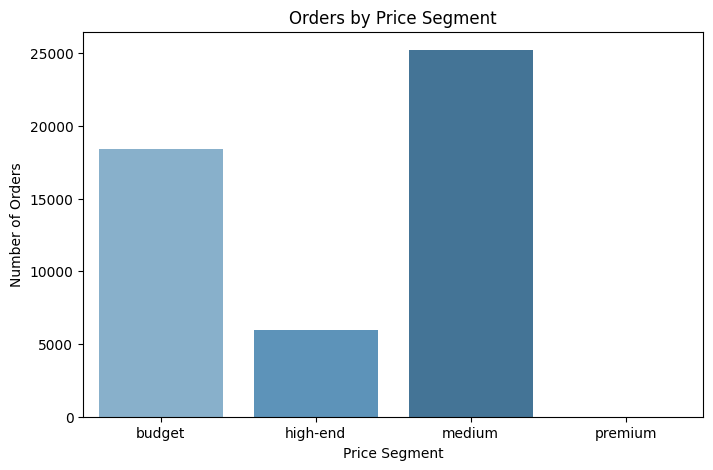

/tmp/ipython-input-644744574.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_price, x="price_bin", y="Avg Discount (%)", palette="Oranges_d")


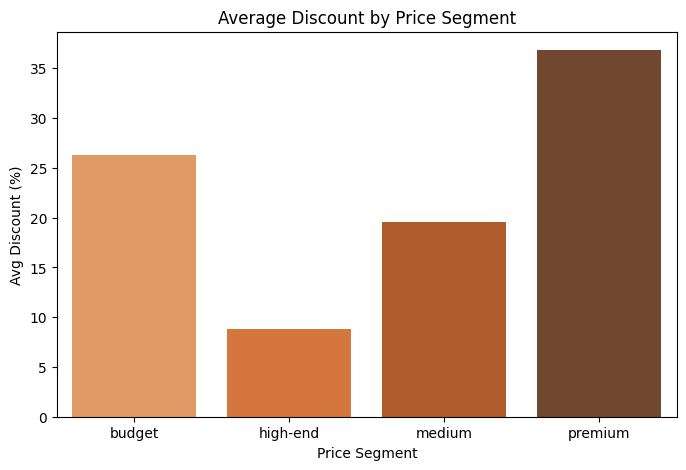

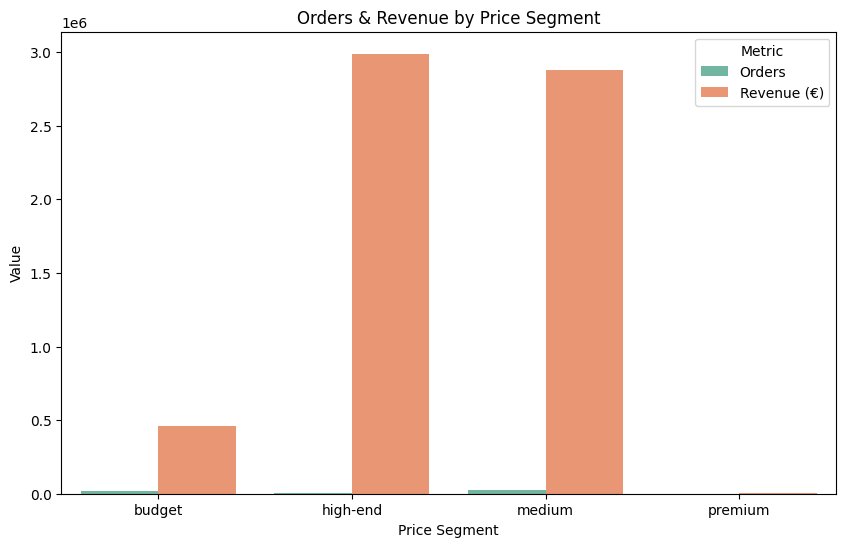

In [94]:
plt.figure(figsize=(8,5))
sns.barplot(data=summary_price, x="price_bin", y="Orders", palette="Blues_d")
plt.title("Orders by Price Segment")
plt.ylabel("Number of Orders")
plt.xlabel("Price Segment")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=summary_price, x="price_bin", y="Avg Discount (%)", palette="Oranges_d")
plt.title("Average Discount by Price Segment")
plt.ylabel("Avg Discount (%)")
plt.xlabel("Price Segment")
plt.show()

plt.figure(figsize=(10,6))
summary_melt = summary_price.melt(id_vars="price_bin", value_vars=["Orders","Revenue (€)"],
                                  var_name="Metric", value_name="Value")

sns.barplot(data=summary_melt, x="price_bin", y="Value", hue="Metric", palette="Set2")
plt.title("Orders & Revenue by Price Segment")
plt.ylabel("Value")
plt.xlabel("Price Segment")
plt.show()

In [96]:
heatmap_data = summary_price.melt(id_vars="price_bin",
                                  var_name="Metric",
                                  value_name="Value")

heatmap_pivot = heatmap_data.pivot(index="Metric",
                                   columns="price_bin",
                                   values="Value")

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(
    heatmap_pivot,
    annot=True, fmt=".1f", cmap="YlGnBu"
)

plt.title("Performance by Price Segment")
plt.ylabel("Metric")
plt.xlabel("Price Segment")
plt.show()

In [ ]:
summary_price_melted = summary_price.melt(
    id_vars="price_bin",
    value_vars=["Orders","Revenue (€)"],
    var_name="Metric", value_name="Value"
)

plt.figure(figsize=(8,6))
sns.displot(data=summary_price_melted, x="price_bin", y="Value", hue="Metric")
plt.title("Orders & Revenue by Price Segment")
plt.ylabel("Value")
plt.xlabel("Price Segment")
plt.legend(title="")
plt.show()

In [ ]:
top_products_revenue = orders_product_category.groupby(['sku','name','long','year_month'])['unit_price_total'].sum().sort_values(ascending=False).head(10).reset_index()
top_products_revenue

In [ ]:
top_products_revenue.groupby('year_month')

In [ ]:
top_products_orders = orders_product_category.groupby(['sku','name','long','year_month'])['id_order'].count().sort_values(ascending=False).head(10)
top_products_orders

In [ ]:
orders_product_category.groupby(['long']).agg({'unit_price_total':'sum','id_order':'count','discount_percentage':'mean'}).sort_values(by='unit_price_total',ascending=False).head(10)